In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from scipy.stats import chi2_contingency

In [2]:
path='/content/drive/MyDrive/Meesho_Orderscleaned.csv'
df=pd.read_csv(path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86327 entries, 0 to 86326
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ReasonforCreditEntry     86326 non-null  object 
 1   SubOrderNo               86326 non-null  object 
 2   OrderDate                86326 non-null  object 
 3   CustomerState            43884 non-null  object 
 4   ProductName              86326 non-null  object 
 5   SKU                      86325 non-null  object 
 6   Size                     86326 non-null  object 
 7   Quantity                 86327 non-null  int64  
 8   SupplierListedPrice      86327 non-null  int64  
 9   SupplierDiscountedPrice  86327 non-null  float64
 10  PacketId                 0 non-null      float64
 11  account_id               86327 non-null  int64  
 12  create_time              86327 non-null  object 
 13  update_time              86327 non-null  object 
dtypes: float64(2), int64(3

In [3]:
df = df.drop('PacketId', axis=1)

In [4]:
df['ReasonforCreditEntry'] = df['ReasonforCreditEntry'].replace('Cancelled', 'CANCELLED')

In [5]:
df['ReasonforCreditEntry'] = df['ReasonforCreditEntry'].replace('Shipped', 'SHIPPED')

In [6]:
reason_counts = df['ReasonforCreditEntry'].value_counts()
print(reason_counts)

ReasonforCreditEntry
Delivered              72389
CANCELLED               6385
RTO_COMPLETE            6313
SHIPPED                  689
RTO_LOCKED               127
LOST                     112
READY_TO_SHIP             88
RTO_INITIATED             87
PENDING                   66
RTO_OFD                   37
DOOR_STEP_EXCHANGED       26
RTO_DELIVERY_FAILED        7
Name: count, dtype: int64


In [7]:
print(df['CustomerState'].unique())

[nan 'West Bengal' 'Tamil Nadu' 'Madhya Pradesh' 'Bihar' 'telangana'
 'Karnataka' 'Uttar Pradesh' 'Assam' 'Telangana' 'Andhra Pradesh'
 'Jharkhand' 'Meghalaya' 'Gujarat' 'Haryana' 'Delhi' 'Rajasthan' 'Kerala'
 'Odisha' 'Maharashtra' 'Jammu and Kashmir' 'Uttarakhand' 'Pudhucherry'
 'karnataka' 'Chhattisgarh' 'Andaman and Nicobar Islands' 'uttar pradesh'
 'Himachal Pradesh' 'Tripura' 'Arunachal Pradesh' 'Punjab' 'Mizoram'
 'Chandigarh' 'Puducherry' 'maharashtra' 'Goa' 'Kolkata' 'delhi'
 'Tamil nadu' 'Nagaland' 'Manipur' 'assam' 'chhattisgarh' 'Sikkim'
 'andhra pradesh' 'bihar' 'MAHARASHTRA' 'TAMIL NADU' 'Andhra pradesh'
 'Dadra and Nagar Haveli and Daman and Diu' 'punjab' 'manipur' 'Ladakh'
 'odisha' 'Others' 'tamil nadu' 'HARYANA' 'kerala' 'madhya Pradesh'
 'madhya pradesh' 'Uttar pradesh' 'KARNATAKA' 'rajasthan' 'KERALA'
 'jharkhand' 'uttarakhand' 'gujarat' 'haryana' 'uttar Pradesh'
 'Jammu And Kashmir' 'MahArashtra' 'andhra Pradesh' 'Tamil NADU' 'tripura'
 'CHHATTISGARH' 'ODISHA' 'TEL

# Cleaning States

In [8]:
df['CustomerState'] = df['CustomerState'].replace('telangana', 'Telangana')
df['CustomerState'] = df['CustomerState'].replace('karnataka', 'Karnataka')
df['CustomerState'] = df['CustomerState'].replace('uttar pradesh', 'Uttar Pradesh')
df['CustomerState'] = df['CustomerState'].replace('maharashtra', 'Maharashtra')
df['CustomerState'] = df['CustomerState'].replace('Kolkata', 'West Bengal')
df['CustomerState'] = df['CustomerState'].replace('delhi', 'Delhi')
df['CustomerState'] = df['CustomerState'].replace('Tamil nadu', 'Tamil Nadu')
df['CustomerState'] = df['CustomerState'].replace('assam', 'Assam')
df['CustomerState'] = df['CustomerState'].replace('chattisgarh', 'Chattisgarh')
df['CustomerState'] = df['CustomerState'].replace('andhra pradesh', 'Andhra Pradesh')
df['CustomerState'] = df['CustomerState'].replace('bihar', 'Bihar')
df['CustomerState'] = df['CustomerState'].replace('MAHARASHTRA', 'Maharashtra')
df['CustomerState'] = df['CustomerState'].replace('TAMIL NADU', 'Tamil Nadu')
df['CustomerState'] = df['CustomerState'].replace('Andhra pradesh', 'Andhra Pradesh')
df['CustomerState'] = df['CustomerState'].replace('punjab', 'Punjab')
df['CustomerState'] = df['CustomerState'].replace('manipur', 'Manipur')
df['CustomerState'] = df['CustomerState'].replace('odisha', 'Odisha')
df['CustomerState'] = df['CustomerState'].replace('tamil nadu', 'Tamil Nadu')
df['CustomerState'] = df['CustomerState'].replace('HARYANA', 'Haryana')
df['CustomerState'] = df['CustomerState'].replace('kerala', 'Kerala')
df['CustomerState'] = df['CustomerState'].replace('madhya Pradesh', 'Madhya Pradesh')
df['CustomerState'] = df['CustomerState'].replace('madhya pradesh', 'Madhya Pradesh')
df['CustomerState'] = df['CustomerState'].replace('uttar Pradesh', 'Uttar Pradesh')
df['CustomerState'] = df['CustomerState'].replace('Uttar pradesh', 'Uttar Pradesh')
df['CustomerState'] = df['CustomerState'].replace('MahArashtra', 'Maharashtra')
df['CustomerState'] = df['CustomerState'].replace('andhra Pradesh', 'Andhra Pradesh')
df['CustomerState'] = df['CustomerState'].replace('Tamil NADU', 'Tamil Nadu')
df['CustomerState'] = df['CustomerState'].replace('tripura', 'Tripura')
df['CustomerState'] = df['CustomerState'].replace('CHHATTISGARH', 'Chhattisgarh')
df['CustomerState'] = df['CustomerState'].replace('ODISHA', 'Odisha')
df['CustomerState'] = df['CustomerState'].replace('TELANGANA', 'Telangana')
df['CustomerState'] = df['CustomerState'].replace('GUJARAT', 'Gujarat')
df['CustomerState'] = df['CustomerState'].replace('Uttrakhand', 'Uttarakhand')
df['CustomerState'] = df['CustomerState'].replace('West Tripura', 'Tripura')
df['CustomerState'] = df['CustomerState'].replace('Pudhucherry', 'Puducherry')
df['CustomerState'] = df['CustomerState'].replace('chhattisgarh', 'Chattisgarh')
df['CustomerState'] = df['CustomerState'].replace('uttarakhand', 'Uttarakhand')
df['CustomerState'] = df['CustomerState'].replace('gujarat', 'Gujarat')
df['CustomerState'] = df['CustomerState'].replace('haryana', 'Haryana')
df['CustomerState'] = df['CustomerState'].replace('KERALA', 'Kerala')
df['CustomerState'] = df['CustomerState'].replace('jharkhand', 'Jharkhand')
df['CustomerState'] = df['CustomerState'].replace('Chhattisgarh', 'Chattisgarh')
df['CustomerState'] = df['CustomerState'].replace('KARNATAKA', 'Karnataka')
df['CustomerState'] = df['CustomerState'].replace('rajasthan', 'Rajasthan')

In [9]:
print(df['CustomerState'].unique())

[nan 'West Bengal' 'Tamil Nadu' 'Madhya Pradesh' 'Bihar' 'Telangana'
 'Karnataka' 'Uttar Pradesh' 'Assam' 'Andhra Pradesh' 'Jharkhand'
 'Meghalaya' 'Gujarat' 'Haryana' 'Delhi' 'Rajasthan' 'Kerala' 'Odisha'
 'Maharashtra' 'Jammu and Kashmir' 'Uttarakhand' 'Puducherry'
 'Chattisgarh' 'Andaman and Nicobar Islands' 'Himachal Pradesh' 'Tripura'
 'Arunachal Pradesh' 'Punjab' 'Mizoram' 'Chandigarh' 'Goa' 'Nagaland'
 'Manipur' 'Sikkim' 'Dadra and Nagar Haveli and Daman and Diu' 'Ladakh'
 'Others' 'Jammu And Kashmir']


In [10]:
df = df[df['SupplierListedPrice'] >= df['SupplierDiscountedPrice']]

In [11]:
df = df[df['SupplierDiscountedPrice'] < 2 * df['SupplierListedPrice']]

# Handling Datatypes

In [12]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df['create_time'] = pd.to_datetime(df['create_time'])
df['update_time'] = pd.to_datetime(df['update_time'])

<ipython-input-12-82db3b5440ac>:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['OrderDate'] = pd.to_datetime(df['OrderDate'])
<ipython-input-12-82db3b5440ac>:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['create_time'] = pd.to_datetime(df['create_time'])
<ipython-input-12-82db3b5440ac>:3: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['update_time'] = pd.to_datetime(df['update_time'])


# Analysing states

In [13]:
state_order_counts = df['CustomerState'].value_counts()

*use*

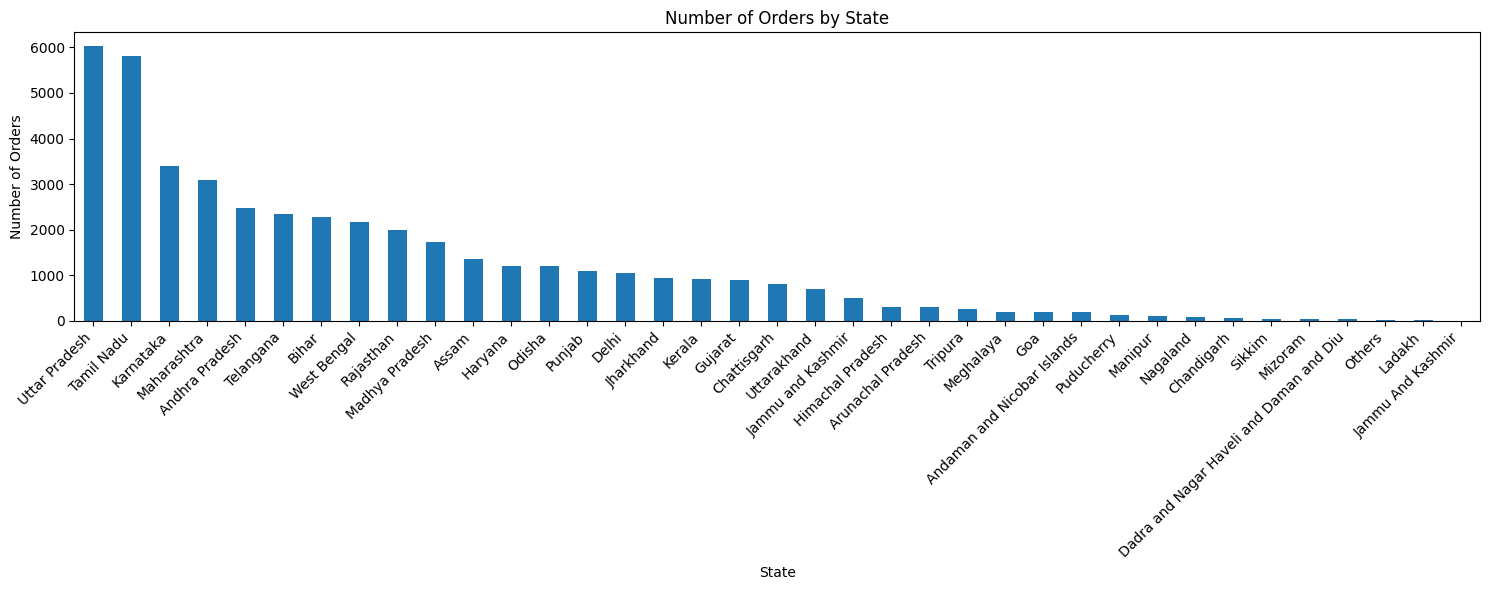

In [14]:
plt.figure(figsize=(15, 6))
state_order_counts.plot(kind='bar')
plt.xlabel('State')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by State')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [15]:
state_revenue = df.groupby('CustomerState')['SupplierDiscountedPrice'].sum()

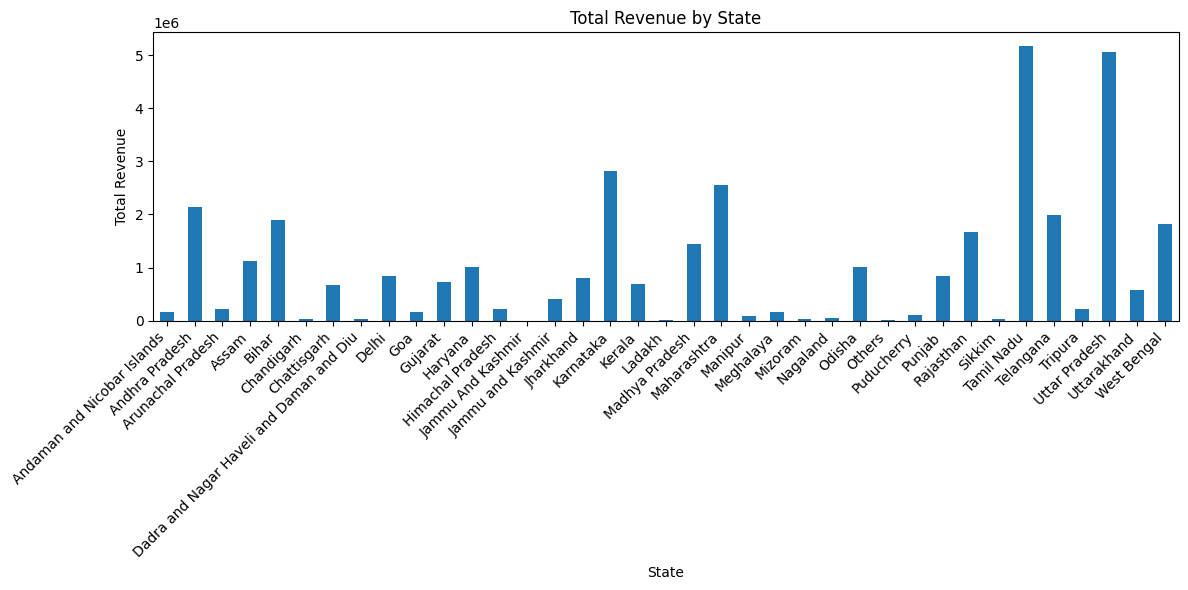

In [16]:
plt.figure(figsize=(12, 6))
state_revenue.plot(kind='bar')
plt.xlabel('State')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by State')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

*use the data below but no graphs*

<ipython-input-17-dce7827f7895>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = state_df.resample('M')['SupplierDiscountedPrice'].sum()


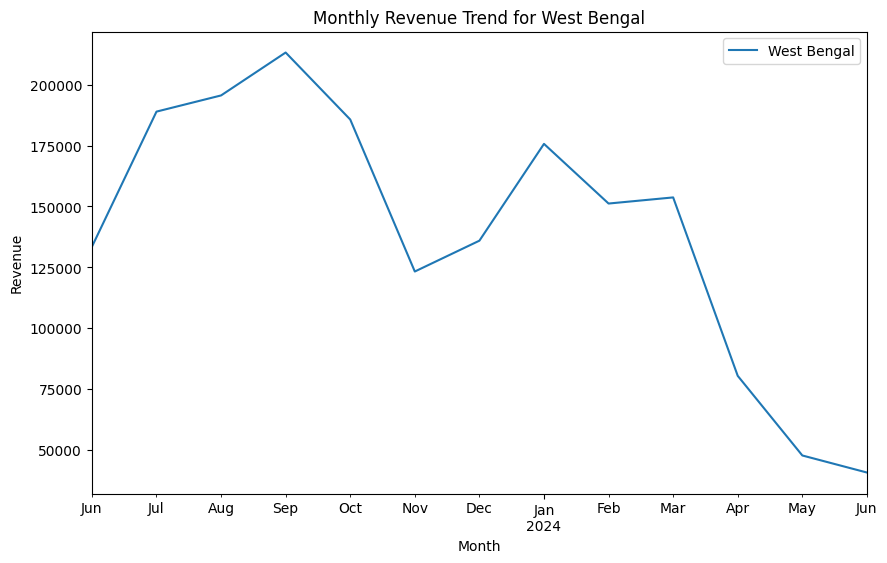

<ipython-input-17-dce7827f7895>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = state_df.resample('M')['SupplierDiscountedPrice'].sum()


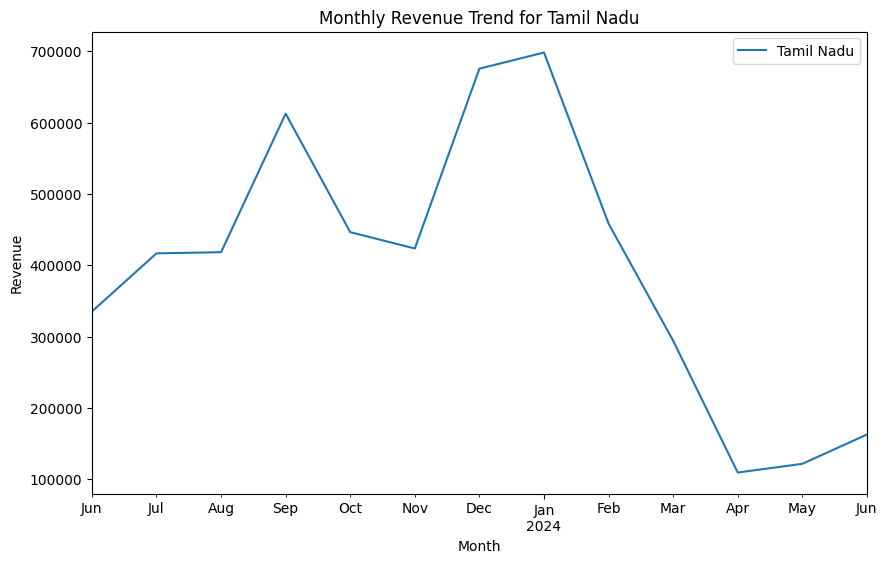

<ipython-input-17-dce7827f7895>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = state_df.resample('M')['SupplierDiscountedPrice'].sum()


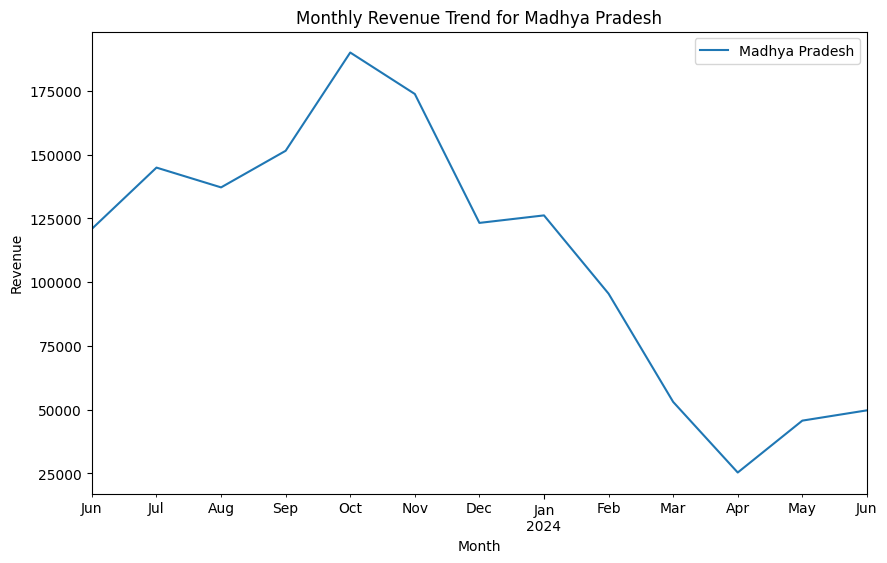

<ipython-input-17-dce7827f7895>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = state_df.resample('M')['SupplierDiscountedPrice'].sum()


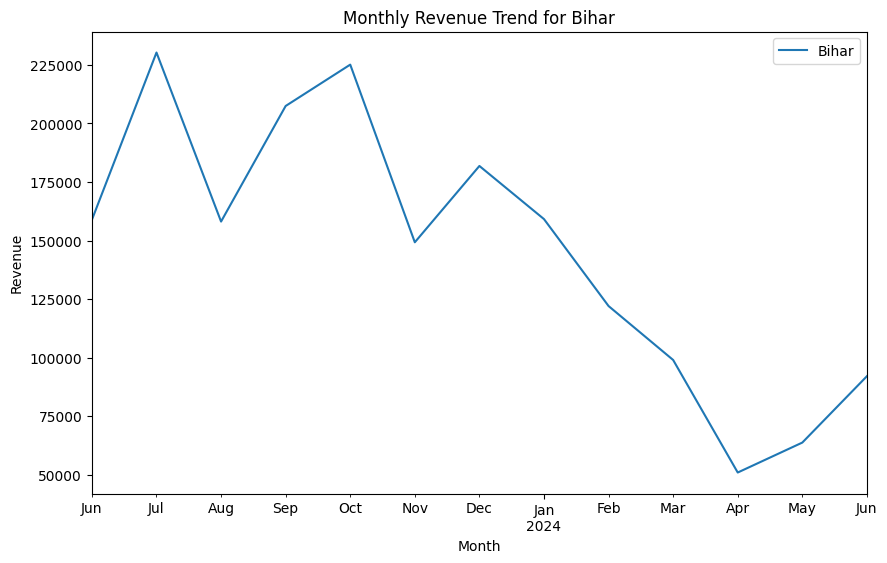

No data available for nan


<ipython-input-17-dce7827f7895>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = state_df.resample('M')['SupplierDiscountedPrice'].sum()
<ipython-input-17-dce7827f7895>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = state_df.resample('M')['SupplierDiscountedPrice'].sum()


<Figure size 1000x600 with 0 Axes>

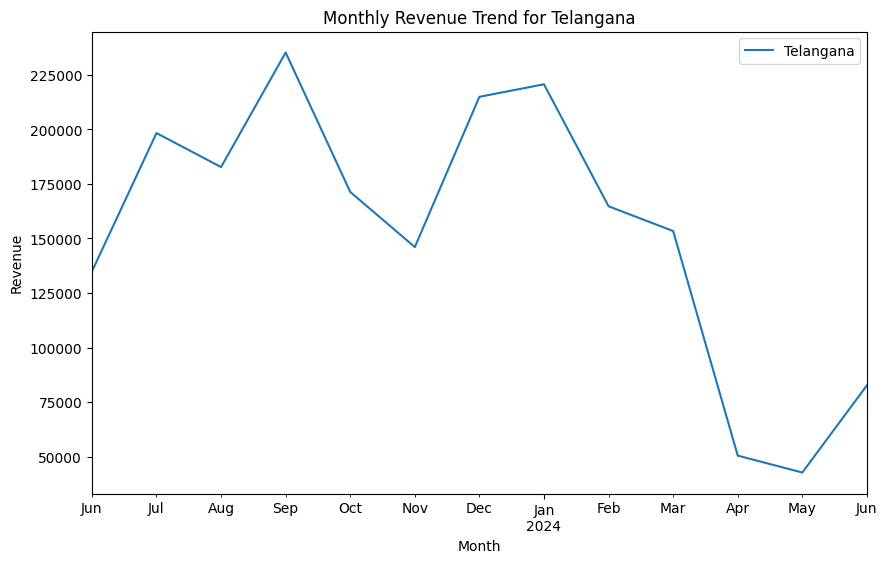

<ipython-input-17-dce7827f7895>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = state_df.resample('M')['SupplierDiscountedPrice'].sum()


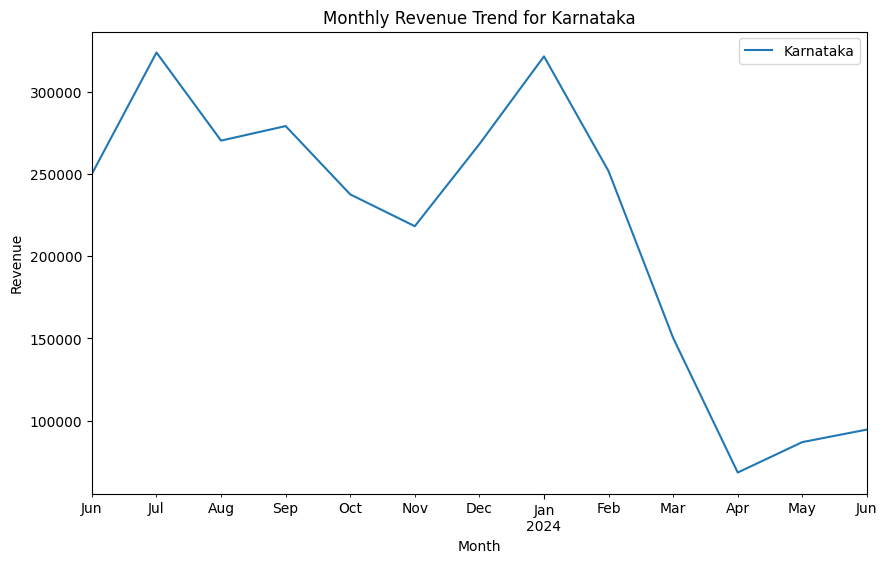

<ipython-input-17-dce7827f7895>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = state_df.resample('M')['SupplierDiscountedPrice'].sum()


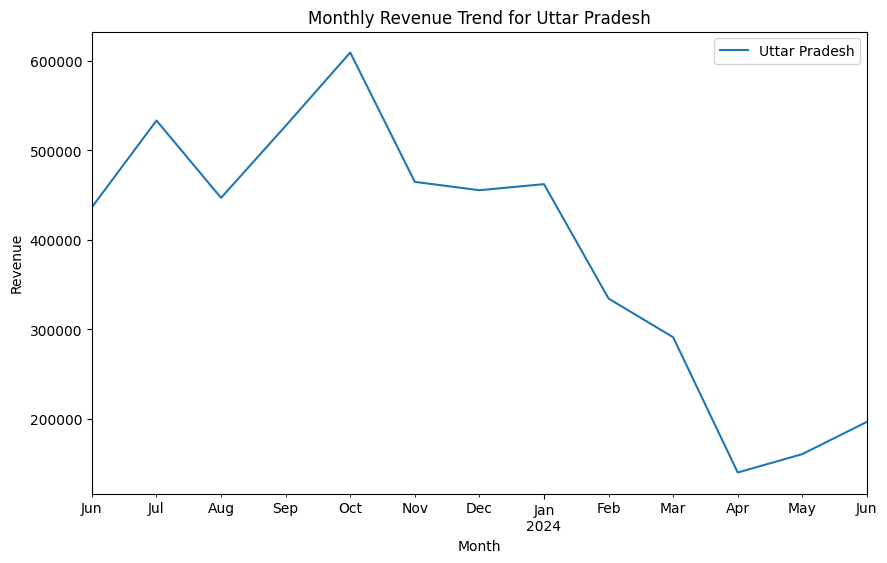

<ipython-input-17-dce7827f7895>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = state_df.resample('M')['SupplierDiscountedPrice'].sum()


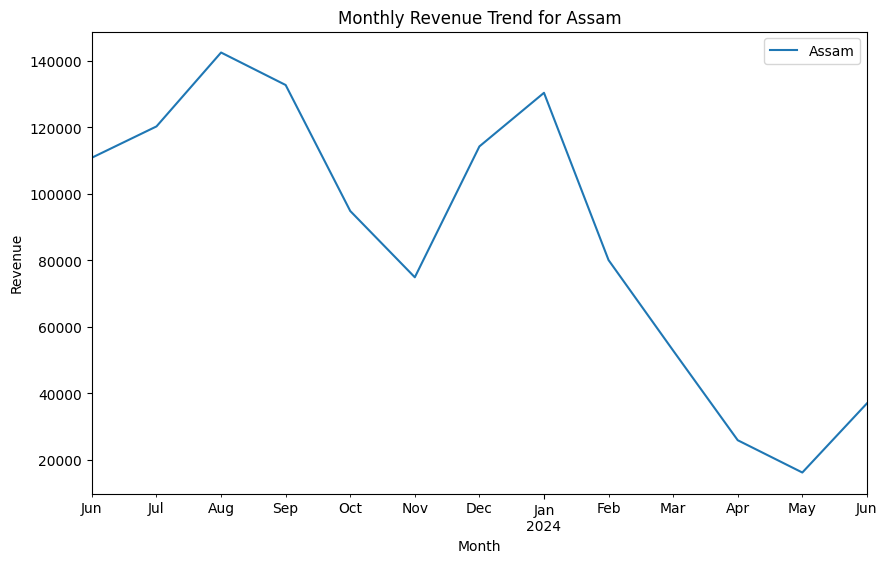

<ipython-input-17-dce7827f7895>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = state_df.resample('M')['SupplierDiscountedPrice'].sum()


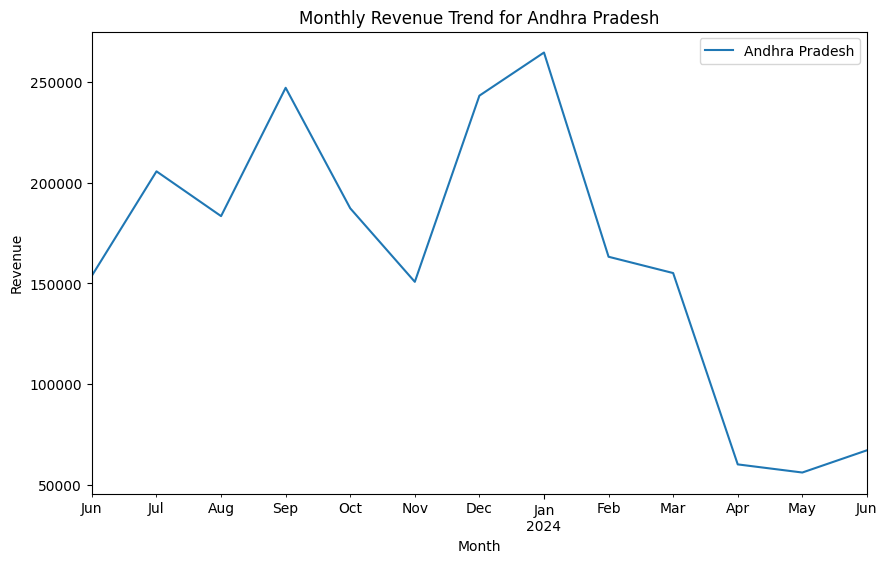

<ipython-input-17-dce7827f7895>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = state_df.resample('M')['SupplierDiscountedPrice'].sum()


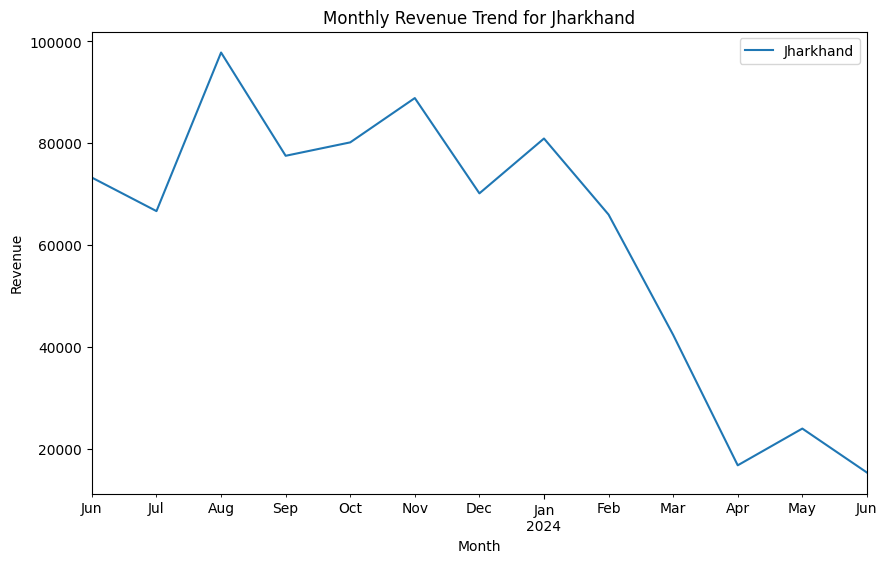

<ipython-input-17-dce7827f7895>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = state_df.resample('M')['SupplierDiscountedPrice'].sum()


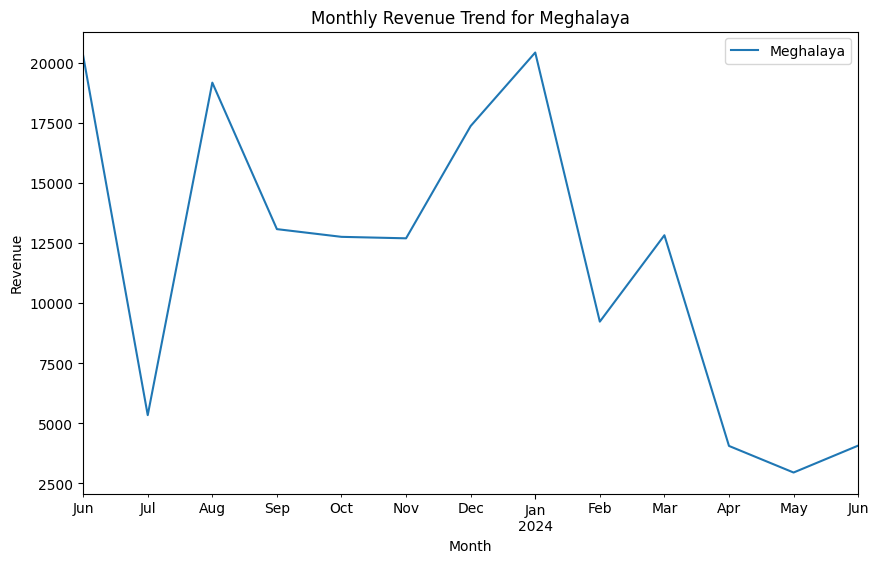

<ipython-input-17-dce7827f7895>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = state_df.resample('M')['SupplierDiscountedPrice'].sum()


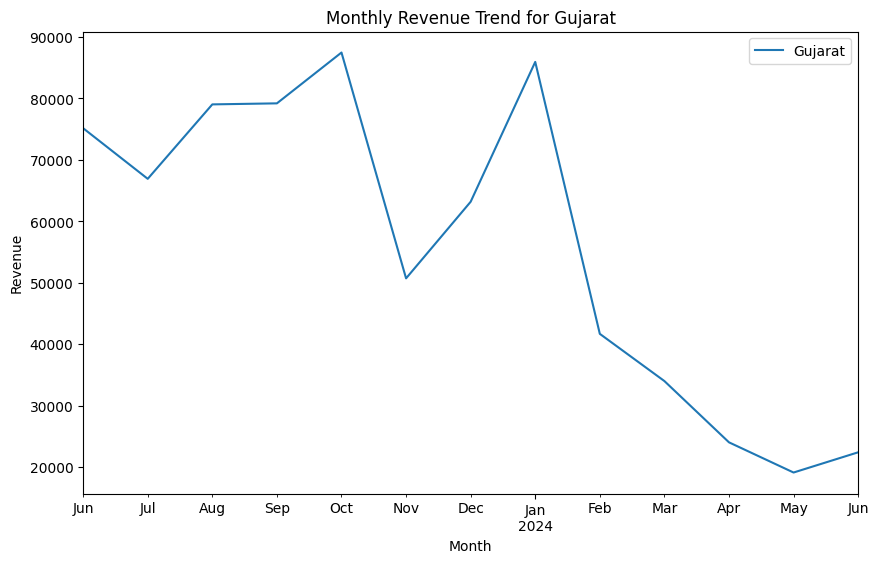

<ipython-input-17-dce7827f7895>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = state_df.resample('M')['SupplierDiscountedPrice'].sum()


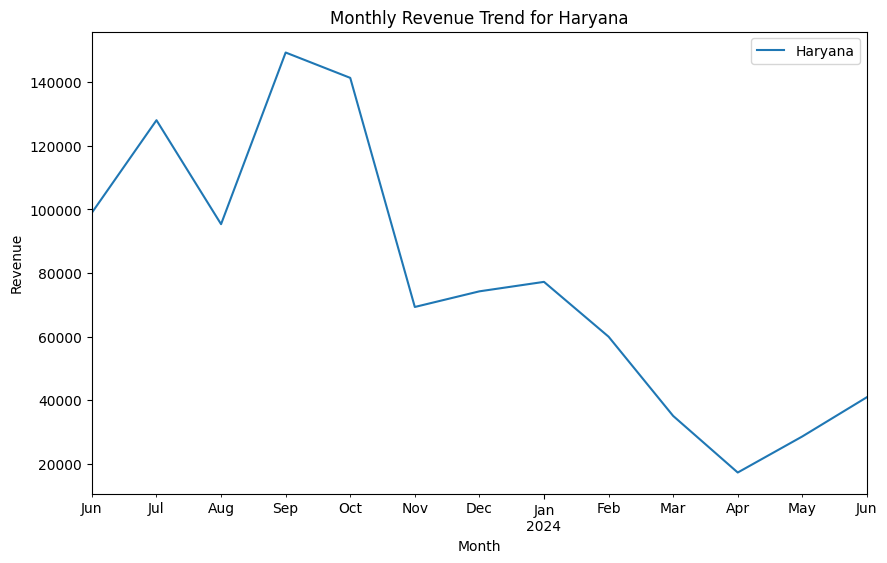

<ipython-input-17-dce7827f7895>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = state_df.resample('M')['SupplierDiscountedPrice'].sum()


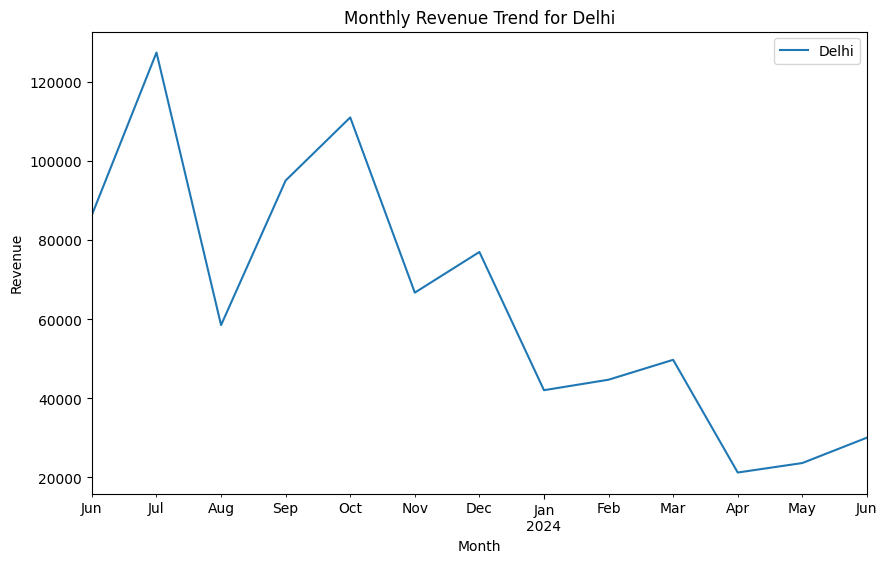

<ipython-input-17-dce7827f7895>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = state_df.resample('M')['SupplierDiscountedPrice'].sum()


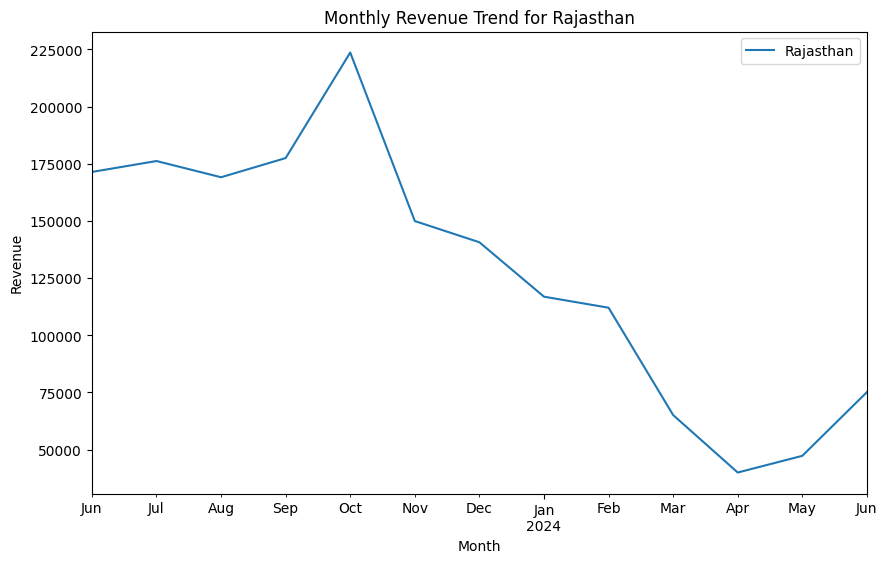

<ipython-input-17-dce7827f7895>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = state_df.resample('M')['SupplierDiscountedPrice'].sum()


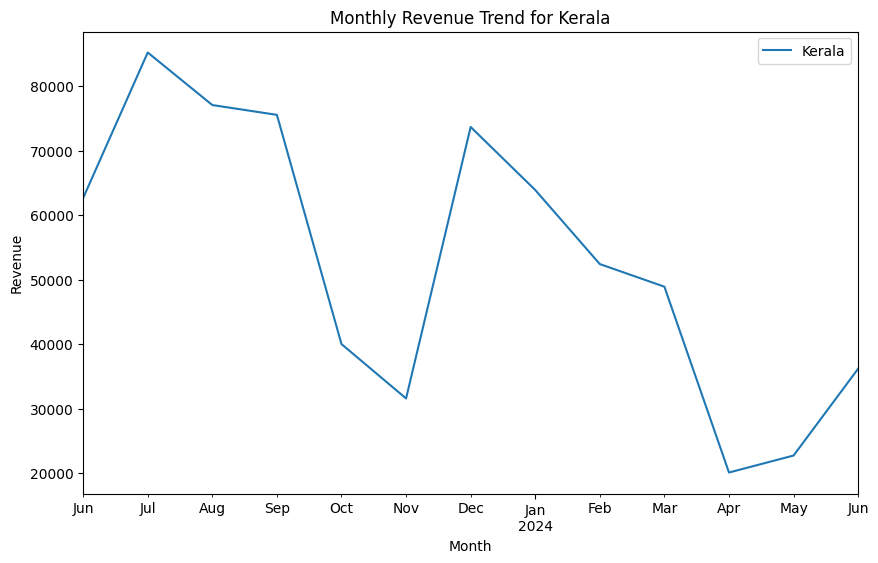

<ipython-input-17-dce7827f7895>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = state_df.resample('M')['SupplierDiscountedPrice'].sum()


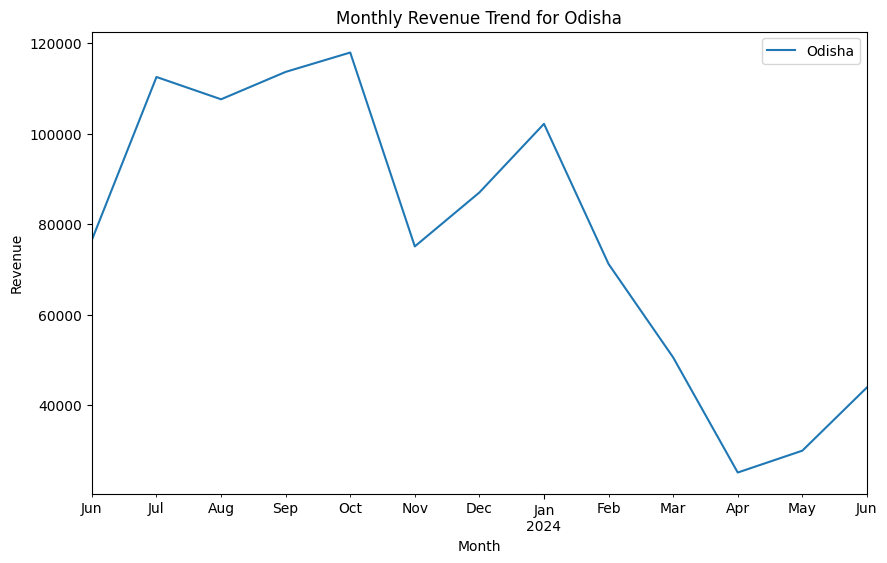

<ipython-input-17-dce7827f7895>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = state_df.resample('M')['SupplierDiscountedPrice'].sum()


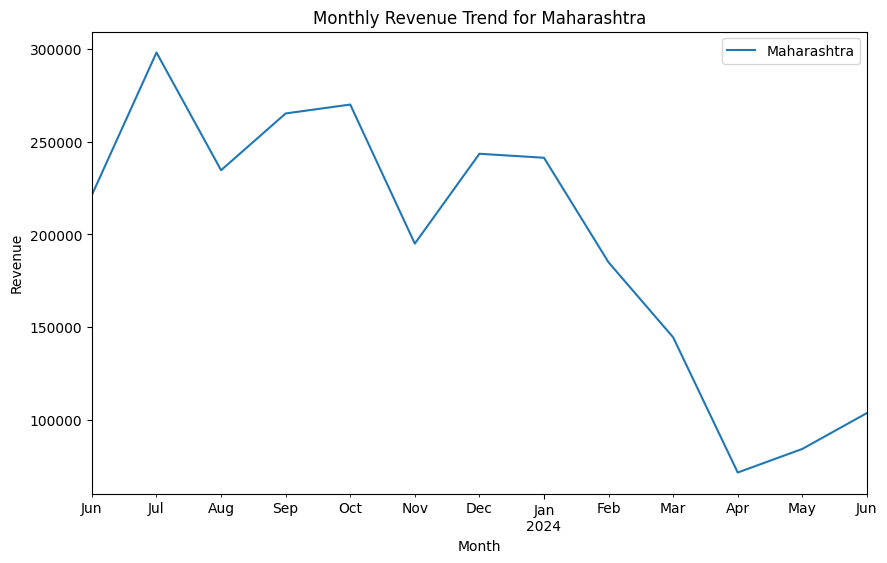

<ipython-input-17-dce7827f7895>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = state_df.resample('M')['SupplierDiscountedPrice'].sum()


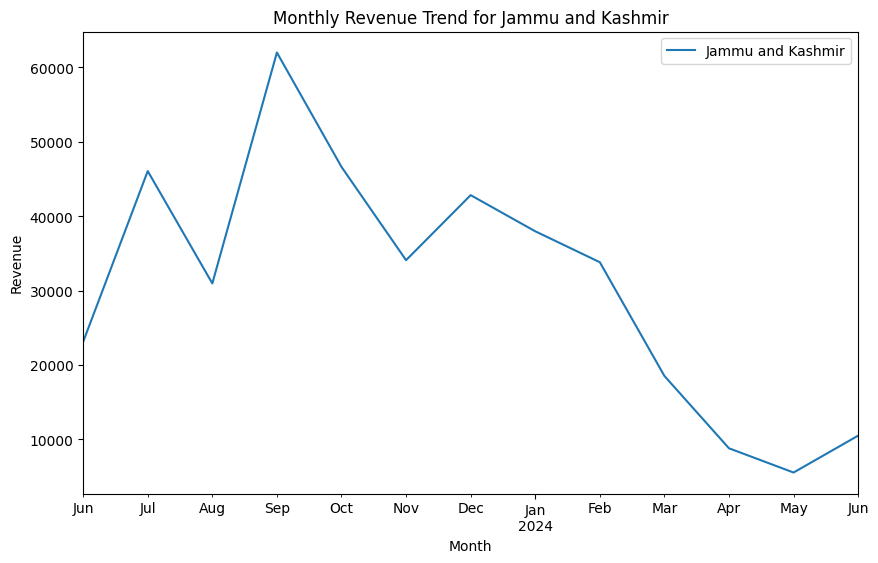

<ipython-input-17-dce7827f7895>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = state_df.resample('M')['SupplierDiscountedPrice'].sum()


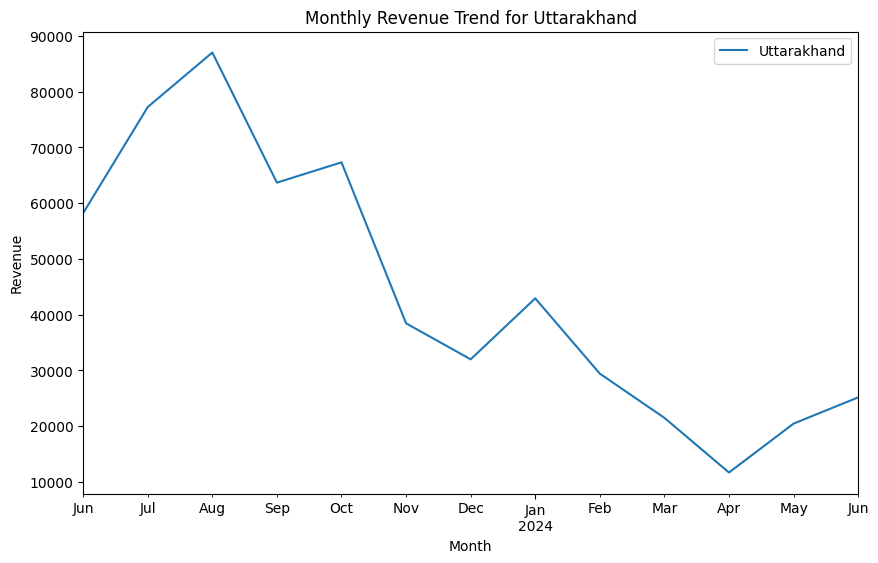

<ipython-input-17-dce7827f7895>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = state_df.resample('M')['SupplierDiscountedPrice'].sum()


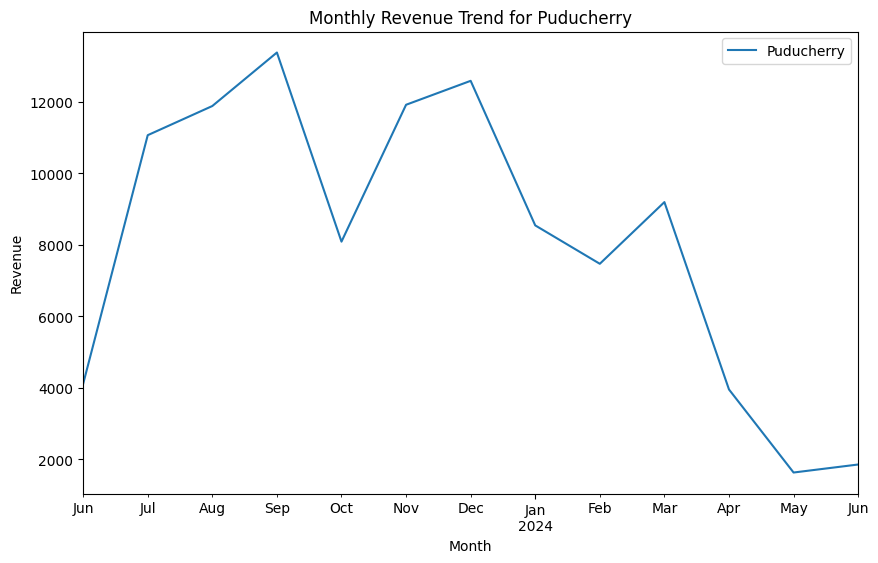

<ipython-input-17-dce7827f7895>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = state_df.resample('M')['SupplierDiscountedPrice'].sum()


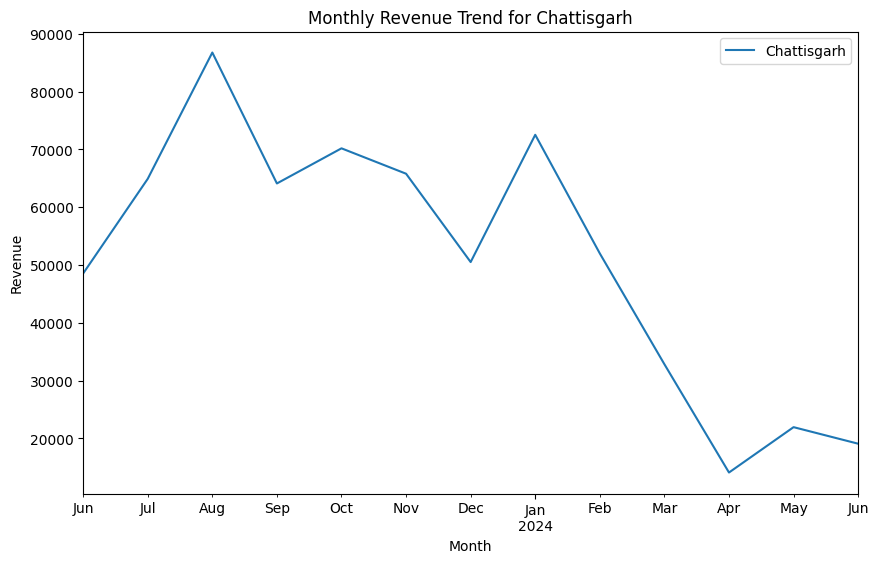

<ipython-input-17-dce7827f7895>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = state_df.resample('M')['SupplierDiscountedPrice'].sum()


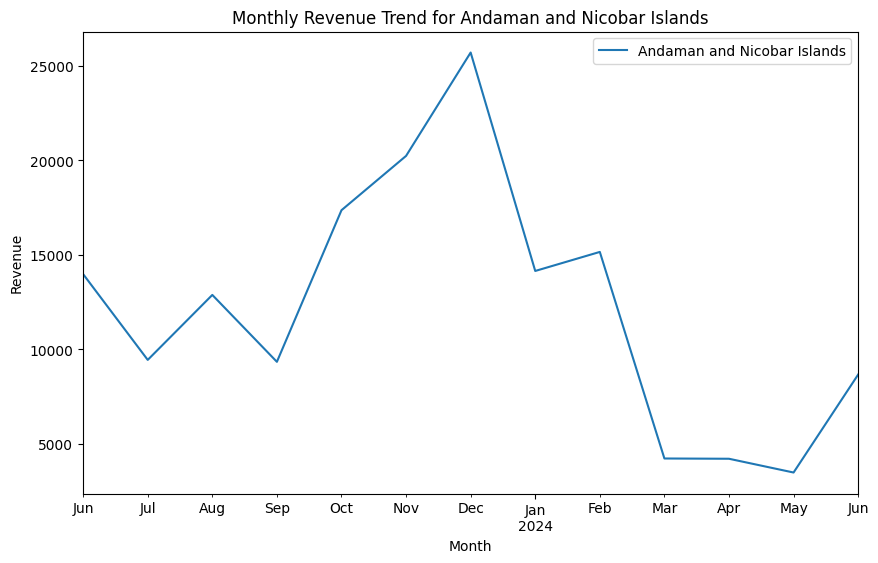

<ipython-input-17-dce7827f7895>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = state_df.resample('M')['SupplierDiscountedPrice'].sum()


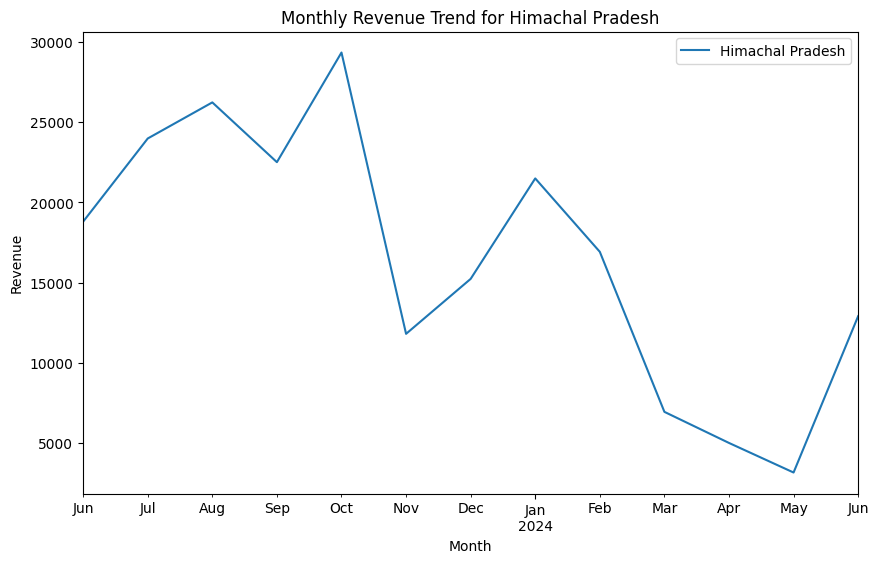

<ipython-input-17-dce7827f7895>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = state_df.resample('M')['SupplierDiscountedPrice'].sum()


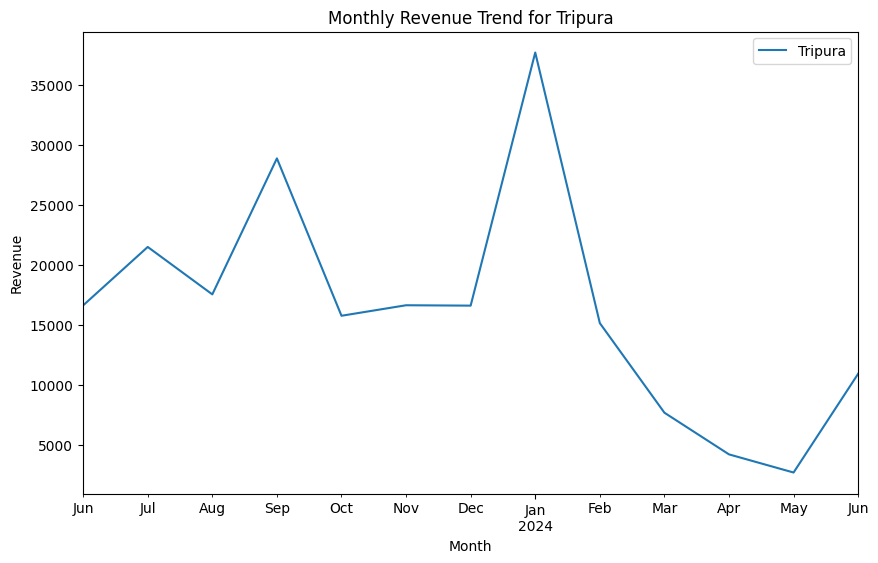

<ipython-input-17-dce7827f7895>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = state_df.resample('M')['SupplierDiscountedPrice'].sum()


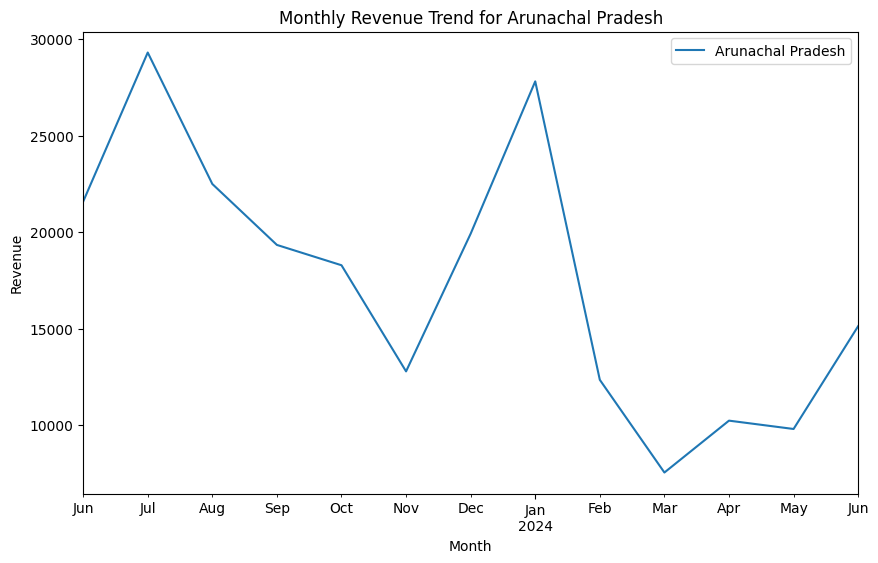

<ipython-input-17-dce7827f7895>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = state_df.resample('M')['SupplierDiscountedPrice'].sum()


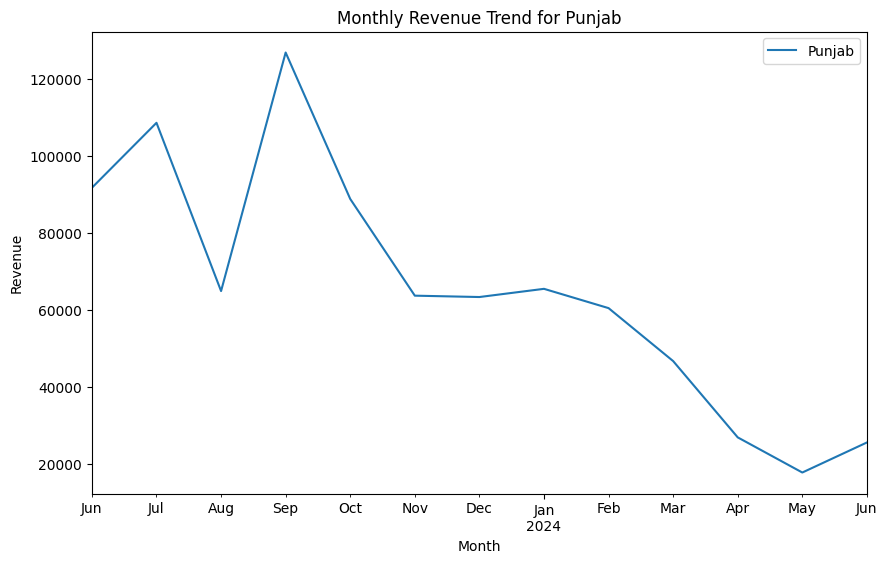

<ipython-input-17-dce7827f7895>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = state_df.resample('M')['SupplierDiscountedPrice'].sum()


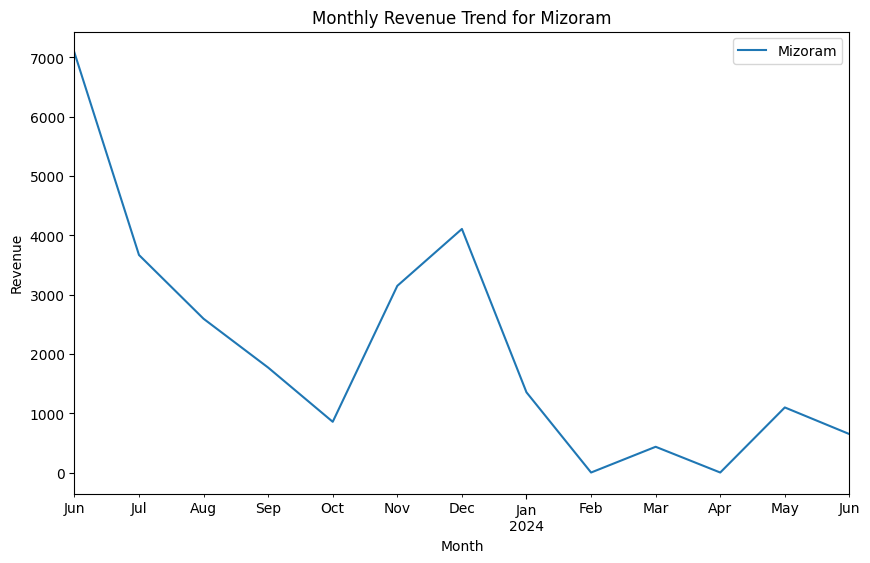

<ipython-input-17-dce7827f7895>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = state_df.resample('M')['SupplierDiscountedPrice'].sum()


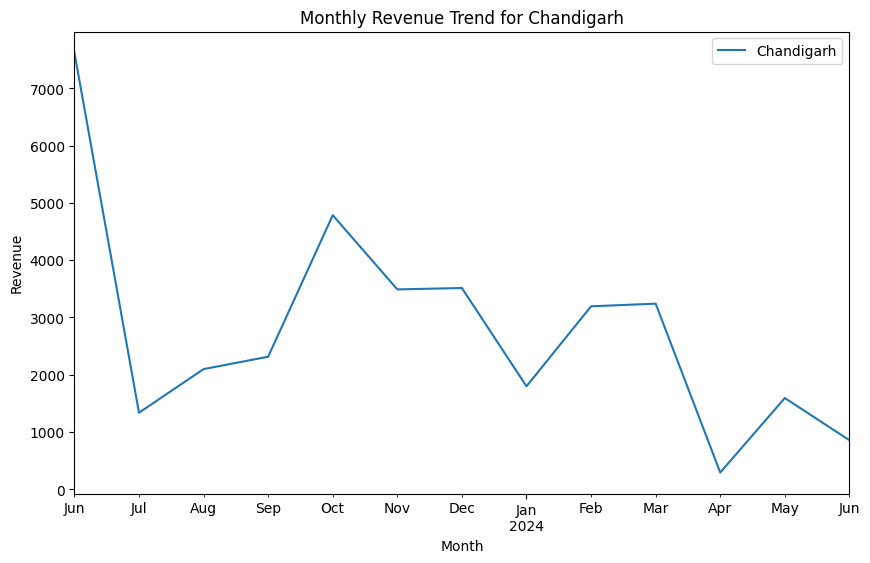

<ipython-input-17-dce7827f7895>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = state_df.resample('M')['SupplierDiscountedPrice'].sum()


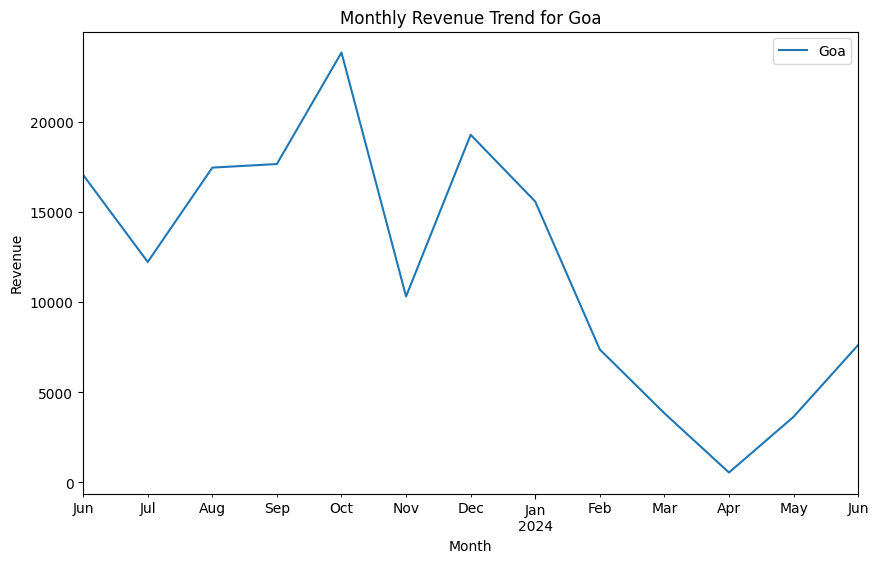

<ipython-input-17-dce7827f7895>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = state_df.resample('M')['SupplierDiscountedPrice'].sum()


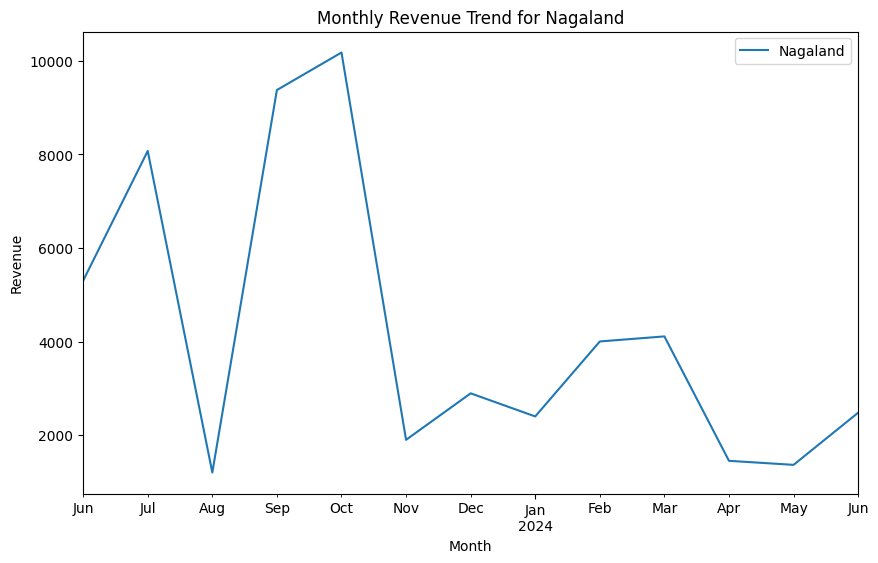

<ipython-input-17-dce7827f7895>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = state_df.resample('M')['SupplierDiscountedPrice'].sum()


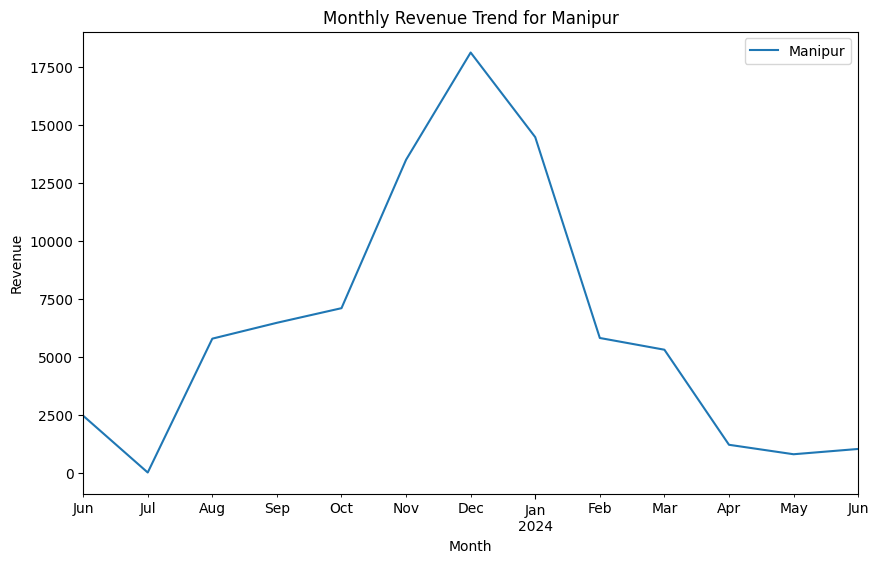

<ipython-input-17-dce7827f7895>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = state_df.resample('M')['SupplierDiscountedPrice'].sum()


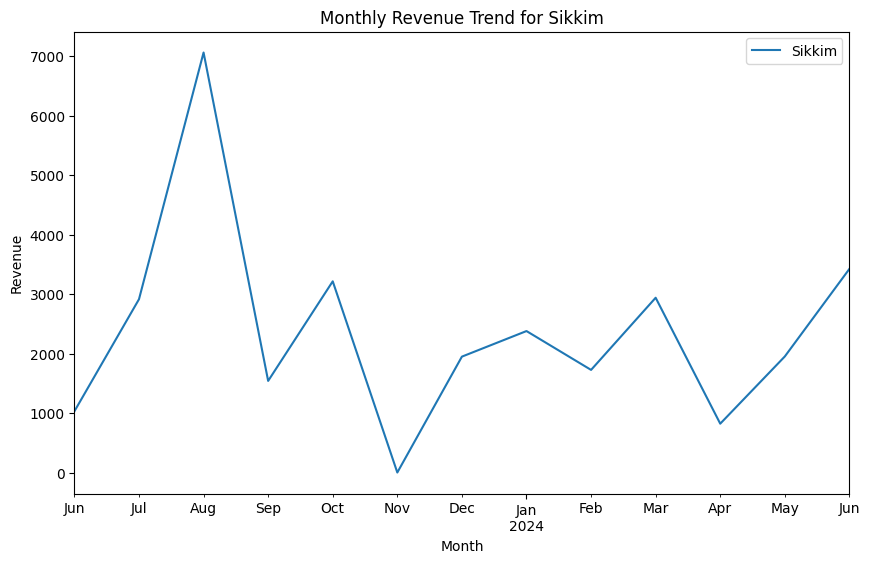

<ipython-input-17-dce7827f7895>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = state_df.resample('M')['SupplierDiscountedPrice'].sum()


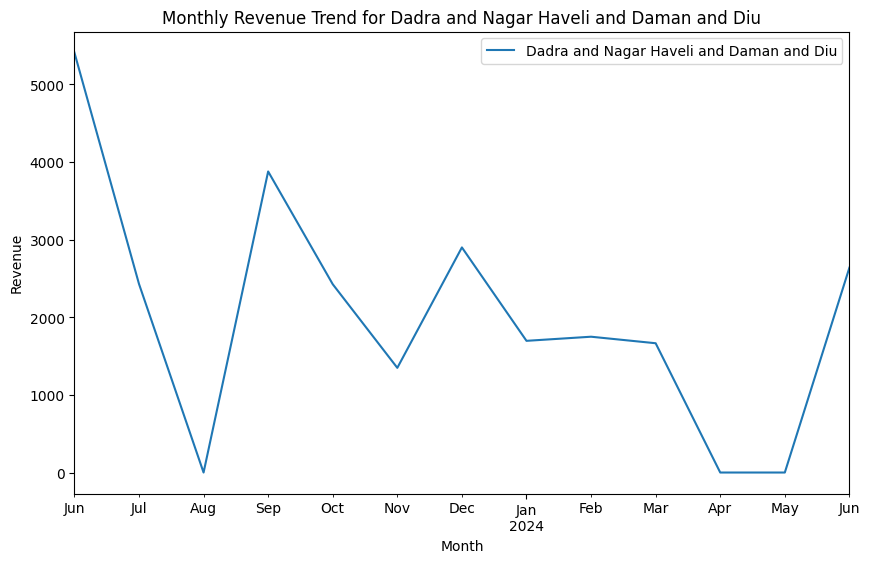

<ipython-input-17-dce7827f7895>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = state_df.resample('M')['SupplierDiscountedPrice'].sum()


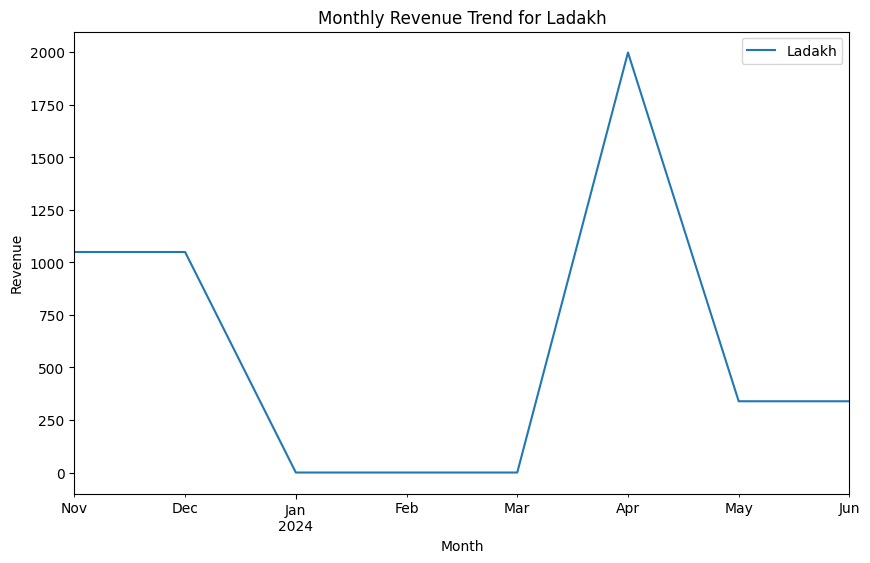

<ipython-input-17-dce7827f7895>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = state_df.resample('M')['SupplierDiscountedPrice'].sum()
/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1561: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


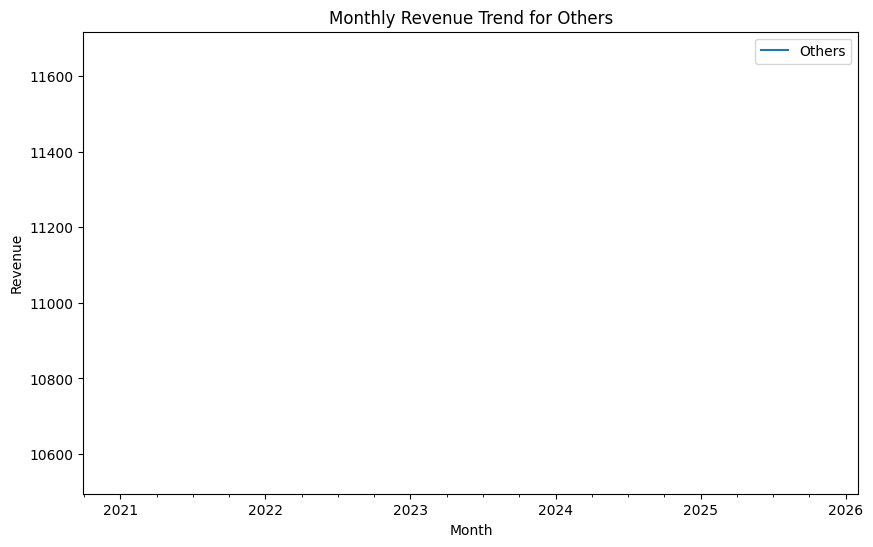

<ipython-input-17-dce7827f7895>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = state_df.resample('M')['SupplierDiscountedPrice'].sum()
/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1561: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


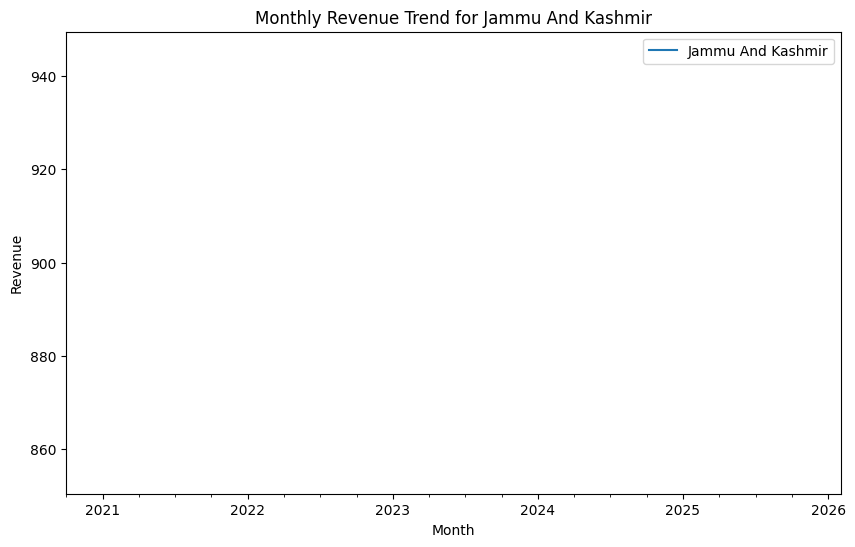

In [17]:
for state in df['CustomerState'].unique():
    plt.figure(figsize=(10, 6))
    state_df = df[df['CustomerState'] == state].copy()
    state_df.set_index('OrderDate', inplace=True)
    monthly_revenue = state_df.resample('M')['SupplierDiscountedPrice'].sum()

    if not monthly_revenue.empty:
        monthly_revenue.plot(label=state)
        plt.xlabel('Month')
        plt.ylabel('Revenue')
        plt.title(f'Monthly Revenue Trend for {state}')
        plt.legend()
        plt.show()
    else:
        print(f"No data available for {state}")

In [18]:
top_states = ['Uttar Pradesh', 'Tamil Nadu', 'Karnataka', 'Maharashtra', 'Andhra Pradesh', 'Telangana', 'Bihar', 'West Bengal', 'Rajasthan', 'Madhya Pradesh']


In [19]:
state_total_orders = df['CustomerState'].value_counts()

*use chatgpt *

In [20]:
state_delivered_counts = df[df['ReasonforCreditEntry'] == 'Delivered']['CustomerState'].value_counts()
state_cancelled_counts = df[df['ReasonforCreditEntry'] == 'CANCELLED']['CustomerState'].value_counts()

delivered_rates = (state_delivered_counts / state_total_orders) * 100
cancelled_rates = (state_cancelled_counts / state_total_orders) * 100

for state in state_total_orders.index:
    print(f"State: {state}")
    print(f"Delivered Rate: {delivered_rates.get(state, 0):.2f}%")
    print(f"Cancelled Rate: {cancelled_rates.get(state, 0):.2f}%")
    print("-" * 20)

State: Uttar Pradesh
Delivered Rate: 67.06%
Cancelled Rate: 15.89%
--------------------
State: Tamil Nadu
Delivered Rate: 73.82%
Cancelled Rate: 12.68%
--------------------
State: Karnataka
Delivered Rate: 69.33%
Cancelled Rate: 13.88%
--------------------
State: Maharashtra
Delivered Rate: 73.90%
Cancelled Rate: 11.48%
--------------------
State: Andhra Pradesh
Delivered Rate: 71.95%
Cancelled Rate: 11.95%
--------------------
State: Telangana
Delivered Rate: 69.79%
Cancelled Rate: 15.92%
--------------------
State: Bihar
Delivered Rate: 62.23%
Cancelled Rate: 15.15%
--------------------
State: West Bengal
Delivered Rate: 71.67%
Cancelled Rate: 14.28%
--------------------
State: Rajasthan
Delivered Rate: 65.62%
Cancelled Rate: 17.39%
--------------------
State: Madhya Pradesh
Delivered Rate: 63.97%
Cancelled Rate: 17.43%
--------------------
State: Assam
Delivered Rate: 57.98%
Cancelled Rate: 14.35%
--------------------
State: Haryana
Delivered Rate: 67.27%
Cancelled Rate: 16.36%
----

In [21]:
for state in df['CustomerState'].unique():
    state_df = df[df['CustomerState'] == state].copy()
    if not state_df.empty:
        earliest_date = state_df['OrderDate'].min()
        print(f"Earliest order date for {state}: {earliest_date}")
    else:
        print(f"No data available for {state}")

Earliest order date for West Bengal: 2023-06-10 00:00:00
Earliest order date for Tamil Nadu: 2023-06-10 00:00:00
Earliest order date for Madhya Pradesh: 2023-06-10 00:00:00
Earliest order date for Bihar: 2023-06-10 00:00:00
No data available for nan
Earliest order date for Telangana: 2023-06-10 00:00:00
Earliest order date for Karnataka: 2023-06-10 00:00:00
Earliest order date for Uttar Pradesh: 2023-06-10 00:00:00
Earliest order date for Assam: 2023-06-10 00:00:00
Earliest order date for Andhra Pradesh: 2023-06-10 00:00:00
Earliest order date for Jharkhand: 2023-06-10 00:00:00
Earliest order date for Meghalaya: 2023-06-10 00:00:00
Earliest order date for Gujarat: 2023-06-10 00:00:00
Earliest order date for Haryana: 2023-06-10 00:00:00
Earliest order date for Delhi: 2023-06-10 00:00:00
Earliest order date for Rajasthan: 2023-06-10 00:00:00
Earliest order date for Kerala: 2023-06-10 00:00:00
Earliest order date for Odisha: 2023-06-10 00:00:00
Earliest order date for Maharashtra: 2023-06

This is quite peculiar. The above information suggests that the states column has been recorded from June, 2023

# Reasons over time


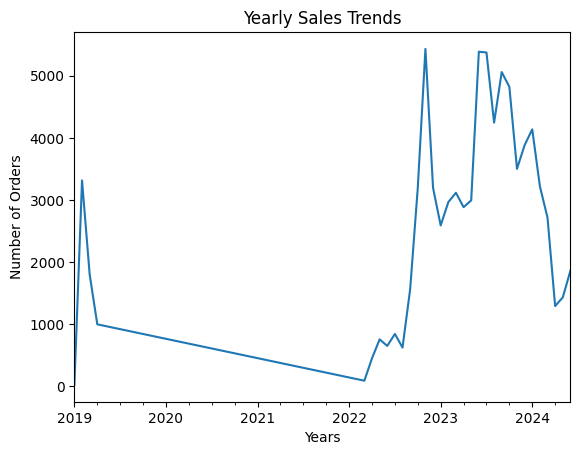

In [22]:
last_two_years = df[df['OrderDate'] >= (pd.to_datetime('today') - pd.DateOffset(years=2))]
sales_trends = last_two_years.groupby(last_two_years['OrderDate'].dt.to_period('M')).size()
sales_trends = df.groupby(df['OrderDate'].dt.to_period('M')).size()
sales_trends.plot(kind='line')
plt.xlabel('Years')
plt.ylabel('Number of Orders')
plt.title('Yearly Sales Trends')
plt.show()

*use*

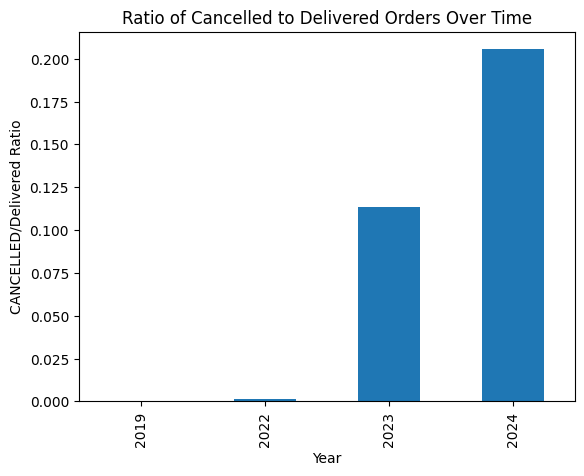

In [23]:
grouped_data = df.groupby([df['OrderDate'].dt.year, 'ReasonforCreditEntry'])['ReasonforCreditEntry'].count().unstack()
grouped_data['Cancelled/Delivered Ratio'] = grouped_data['CANCELLED'] / grouped_data['Delivered']
grouped_data['Cancelled/Delivered Ratio'].plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('CANCELLED/Delivered Ratio')
plt.title('Ratio of Cancelled to Delivered Orders Over Time')
plt.show()

Cancelled/Delivered ratio is increasing over the years

In [24]:
unique_product_names = df['ProductName'].unique()
for name in unique_product_names:
    print(name)

Furshine Universal Triple Seater Sofa Cover Big Elasticity Cover for Couch Flexible Stretch Sofa Slipcover Single Seater, Black Prism 185-230cm ( 1 piece for Triple Seater )
Furshine Universal Triple Seater Sofa Cover Big Elasticity Cover for Couch Flexible Stretch Sofa Slipcover Single Seater, Blend geometric 190-230cm
Furshine Single Seater Sofa Cover Big Elasticity, Protective, Flexible Stretch, Spandex & Polyester Sofa Slipcover Cushion Cover Included (Single Seater, 90 - 145cm, Blue Diamond )
Premium Choice Unique Matte Lipstick
Furshine Universal Single Seater Sofa Cover Big Elasticity Cover for Couch Flexible Stretch Sofa Slipcover Single Seater, Black Prism 90-145cm
Boxn Lunch Box Bento Box - Healthy Rectangle Grid Leak-Proof Food Container for Adults & Kids, 4 Compartment 1000ml (Pink) 1 Containers Lunch Box (1000 ml)
Furshine Universal Triple Seater Sofa Cover Big Elasticity Cover for Couch Flexible Stretch Sofa Slipcover Triple Seater, Blend geometric 185-230cm
Furshine Univ

In [25]:
df['ProductName'] = df['ProductName'].str.replace('?', '', regex=False)

In [26]:
df['ProductName'] = df['ProductName'].str.replace('<', '', regex=False)

In [27]:
df['Company'] = df['ProductName'].str.split().str[0]

In [28]:
def clean_company_name(name):
    """Removes capital letters in the middle of the name and all following letters."""
    if isinstance(name, str):
        match = re.search(r"(?<=\w)[A-Z]", name)
        if match:
            name = name[:match.start()]
        return name
    else:
        return name
df['Company'] = df['Company'].apply(clean_company_name)

unique_companies = df['Company'].unique()
sorted_companies = sorted([str(company) for company in unique_companies])

for company in sorted_companies:
    print(company)

2
24
3
360°
3ft
5
A
Age
Attractive
B
Backpack(black)
Basic
Battery
Bhavbhav
Bluetooth
Boxn
Bucket
C
Car
Casual
Classy
Cleaning
Clothes
Color
Colored
Combo
Concealer
Craft
Crystal
Dancing
Data
Decorare
Dreamland
Dual
Dustpan
Elegant
Elite
Extension
Fancy
Fast
Flying
Foldable
Footstools,
Fork
Full
Fur
Furshine
Gem
Half
Hand
Height
Heng
Hilary
Holi
Home
J
K
Lunch
Luxurious
M
M-13
Madness
Manual
Matt
Matte
Mattlook
Mini
Miniso
Mobile
Multipurpose
Natural
Oxidised
P
Pink
Pinkline
Plain
Plastic
Plush
Portable
Premium
Remaxe
Romantic
Rose
Screw
Silicone
Slippers
Soft
Solid
Spoon
Standard
Stylish
Surya
Swimming
Toothpick
Trendy
U
Unbreakable
Unique
Universal
Vegetable
Vessel
Voguish
W
Wall
Water
Whitecherry
Wind
Wired
Wireless
Witcherry
Women
Women's
Wonderful
Z
Zhola
Zodak
sunisa
tray


In [29]:
company_counts = df['Company'].value_counts()
total_orders = len(df)
company_percentages = (company_counts / total_orders) * 100
top_5_companies = company_percentages.head(5)
print("Top 5 Companies:")
for company, percentage in top_5_companies.items():
    print(f"{company}: {percentage:.2f}%")

Top 5 Companies:
Furshine: 61.73%
Boxn: 20.49%
Pink: 1.59%
Whitecherry: 1.58%
W: 1.38%


In [29]:
pink_orders_count = df['ProductName'].str.lower().str.startswith('pink').sum()
print(f"Number of orders starting with 'pink': {pink_orders_count}")

In [30]:
target_companies = ['Furshine', 'Whitecherry', 'Boxn']

In [31]:
df['OrderYear'] = df['OrderDate'].dt.year

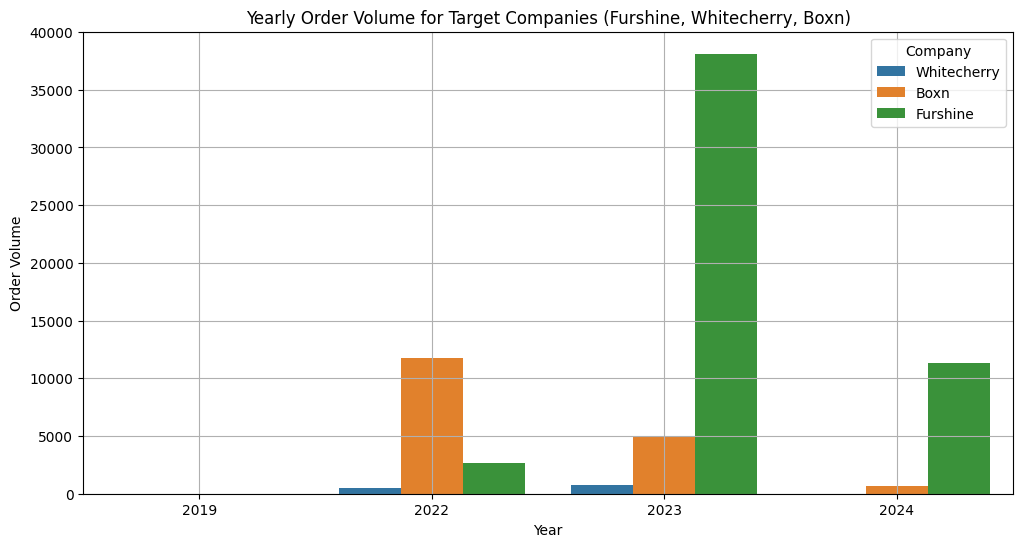

In [32]:
filtered_df = df[df['Company'].isin(target_companies)]
yearly_order_volume = filtered_df.groupby(['OrderYear', 'Company'])['account_id'].count().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='OrderYear', y='account_id', hue='Company', data=yearly_order_volume)

plt.title('Yearly Order Volume for Target Companies (Furshine, Whitecherry, Boxn)')
plt.xlabel('Year')
plt.ylabel('Order Volume')
plt.legend(title='Company')
plt.grid(True)
plt.show()

In [33]:
cancelled_orders = df[df['Company'].isin(target_companies) & (df['ReasonforCreditEntry'] == 'CANCELLED')]

In [34]:
total_orders_per_company = df[df['Company'].isin(target_companies)]['Company'].value_counts()
cancelled_orders_per_company = cancelled_orders['Company'].value_counts()

cancellation_percentages = (cancelled_orders_per_company / total_orders_per_company) * 100
print("Percentage of Orders with 'Cancelled' Reason for Credit Entry:")
for company, percentage in cancellation_percentages.items():
    print(f"{company}: {percentage:.2f}%")

Percentage of Orders with 'Cancelled' Reason for Credit Entry:
Furshine: 10.26%
Boxn: 2.13%
Whitecherry: 4.13%


In [35]:
cancelled_orders = df[df['ReasonforCreditEntry'] == 'CANCELLED']

In [36]:
target_company_cancelled_orders = cancelled_orders[cancelled_orders['Company'].isin(target_companies)]

total_cancelled_orders = len(cancelled_orders)
company_contributions = target_company_cancelled_orders['Company'].value_counts() / total_cancelled_orders * 100

In [37]:
print("Percentage Contribution to Total Cancelled Orders:")
for company, percentage in company_contributions.items():
    print(f"{company}: {percentage:.2f}%")

Percentage Contribution to Total Cancelled Orders:
Furshine: 83.78%
Boxn: 5.78%
Whitecherry: 0.86%


*use*

In [38]:
total_cancelled = df[df['ReasonforCreditEntry'] == 'CANCELLED'].shape[0]
furshine_cancelled = df[(df['ReasonforCreditEntry'] == 'CANCELLED') &
                        (df['ProductName'].str.lower().str.startswith('furshine'))].shape[0]

total_furshine = df[df['ProductName'].str.lower().str.startswith('furshine', na=False)].shape[0]
print("Total Cancelled Orders:", total_cancelled)
print("Cancelled Orders with ProductName starting with 'furshine':", furshine_cancelled)
print("Total ProductName starting with 'furshine':", total_furshine)

Total Cancelled Orders: 6381
Cancelled Orders with ProductName starting with 'furshine': 5346
Total ProductName starting with 'furshine': 52177


this is 84.13% of total cancelled orders and a cancellation rate of 9.93%

In [39]:
furshine_cancelled_df = df[(df['ReasonforCreditEntry'] == 'CANCELLED') &
                           (df['ProductName'].str.lower().str.startswith('furshine', na=False))]

In [40]:
yearly_cancellations = furshine_cancelled_df['OrderDate'].dt.year.value_counts().sort_index()

*use*

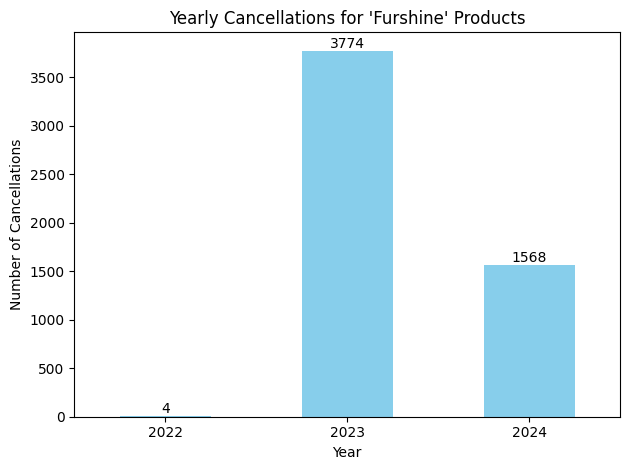

In [41]:
bars = yearly_cancellations.plot(kind='bar', color='skyblue')
plt.title("Yearly Cancellations for 'Furshine' Products")
plt.xlabel("Year")
plt.ylabel("Number of Cancellations")
plt.xticks(rotation=0)
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height(),
             int(bar.get_height()),
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

*use*

In [42]:
cancelled_2023 = df[
    (df['ReasonforCreditEntry'] == 'CANCELLED') &
    (df['ProductName'].str.lower().str.startswith('furshine', na=False)) &
    (df['OrderDate'].dt.year == 2023)
].shape[0]

print("Number of cancelled 'furshine' orders in 2023:", cancelled_2023)

Number of cancelled 'furshine' orders in 2023: 3774


All cancelled orders were from furshine!

In [43]:
unique_account_ids = df['account_id'].unique()
print("Unique Account IDs:")
for account_id in unique_account_ids:
    print(account_id)

Unique Account IDs:
6
7
8
9
22


In [44]:
account_order_counts = df.groupby('account_id')['ReasonforCreditEntry'].count()
account_cancelled_counts = df[df['ReasonforCreditEntry'] == 'CANCELLED'].groupby('account_id')['ReasonforCreditEntry'].count()
cancellation_percentages = (account_cancelled_counts / account_order_counts) * 100
cancellation_percentages = cancellation_percentages.fillna(0)
print("Cancellation Percentage for Each Account:")
for account_id, percentage in cancellation_percentages.items():
    print(f"Account ID {account_id}: {percentage:.2f}%")

Cancellation Percentage for Each Account:
Account ID 6: 10.77%
Account ID 7: 8.03%
Account ID 8: 3.45%
Account ID 9: 13.65%
Account ID 22: 11.34%


In [45]:
cancelled_orders['Year'] = cancelled_orders['OrderDate'].dt.year
cancelled_counts = cancelled_orders.groupby(['account_id', 'Year']).size().reset_index(name='CancelledOrders')

print(cancelled_counts)

    account_id  Year  CancelledOrders
0            6  2023             1625
1            6  2024              913
2            7  2022               15
3            7  2023             1850
4            7  2024              878
5            8  2019                1
6            8  2022               13
7            8  2023              699
8            8  2024              147
9            9  2023              135
10           9  2024               94
11          22  2024               11


<ipython-input-45-3c9ed6dc146d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancelled_orders['Year'] = cancelled_orders['OrderDate'].dt.year


In [46]:
earliest_date = df['OrderDate'].min()

print(f"Earliest Order Date: {earliest_date}")

Earliest Order Date: 2019-01-19 00:00:00


In [47]:
df['Discount'] = df['SupplierListedPrice'] - df['SupplierDiscountedPrice']
df['IsCancelled'] = df['ReasonforCreditEntry'].apply(lambda x: 1 if x == 'CANCELLED' else 0)
X = df[['Discount']]
y = df['IsCancelled']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     15608
           1       0.00      0.00      0.00      1281

    accuracy                           0.92     16889
   macro avg       0.46      0.50      0.48     16889
weighted avg       0.85      0.92      0.89     16889



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [48]:
df['DiscountPercentage'] = ((df['SupplierListedPrice'] - df['SupplierDiscountedPrice']) / df['SupplierListedPrice']) * 100

In [49]:
bin_labels = pd.cut(df['DiscountPercentage'], bins=np.arange(0, 105, 5), right=False)
# Step 3: Create a contingency table
contingency_table = pd.crosstab(bin_labels, df['ReasonforCreditEntry'])

# Step 4: Perform Chi-Square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print results
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies: \n", expected)

Chi-Square Statistic: 501.44324314645417
P-Value: 3.35707761831042e-68
Degrees of Freedom: 66
Expected Frequencies: 
 [[5.96510431e+03 2.43053929e+01 6.58657451e+04 1.04700154e+02
  6.16983051e+01 8.22644068e+01 5.90153636e+03 6.54375963e+00
  8.13295840e+01 1.18722496e+02 3.45884438e+01 6.24461633e+02]
 [3.17575193e+02 1.29399076e+00 3.50661541e+03 5.57411402e+00
  3.28474576e+00 4.37966102e+00 3.14190909e+02 3.48382126e-01
  4.32989214e+00 6.32064715e+00 1.84144838e+00 3.32456086e+01]
 [5.55888942e+01 2.26502311e-01 6.13803840e+02 9.75702264e-01
  5.74967405e-01 7.66623207e-01 5.49965035e+01 6.09813915e-02
  7.57911580e-01 1.10637667e+00 3.22330212e-01 5.81936707e+00]
 [2.45044921e+01 9.98459168e-02 2.70574754e+02 4.30105488e-01
  2.53455020e-01 3.37940026e-01 2.42433566e+01 2.68815930e-02
  3.34099799e-01 4.87708901e-01 1.42088420e-01 2.56527202e+00]
 [1.57312789e+01 6.40986133e-02 1.73702311e+02 2.76117103e-01
  1.62711864e-01 2.16949153e-01 1.55636364e+01 1.72573190e-02
  2.144838

In [50]:
cancelled_counts = df.groupby('DiscountPercentage')['IsCancelled'].sum().reset_index()

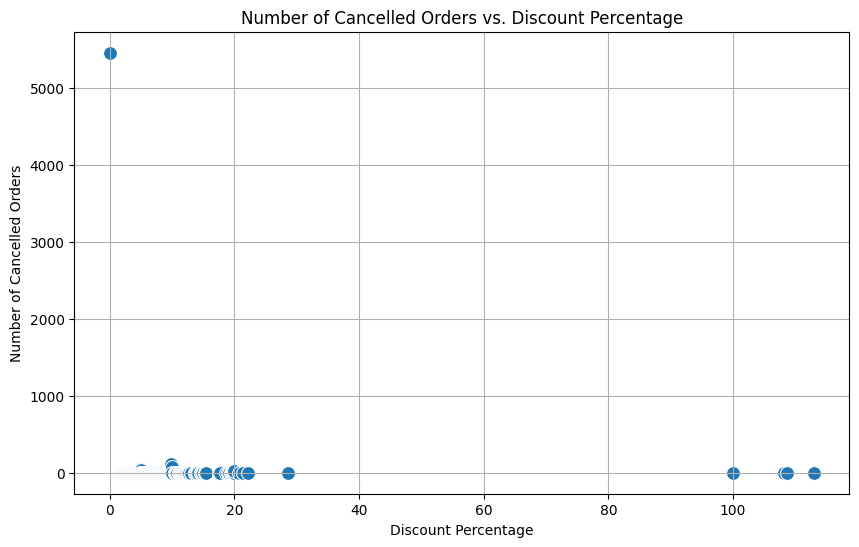

In [51]:
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.scatterplot(x='DiscountPercentage', y='IsCancelled', data=cancelled_counts, s=100)  # s controls marker size
plt.title('Number of Cancelled Orders vs. Discount Percentage')
plt.xlabel('Discount Percentage')
plt.ylabel('Number of Cancelled Orders')
plt.grid(True)
plt.show()

In [52]:
total_cancelled_orders = len(cancelled_orders)
cancelled_orders['DiscountPercentage'] = ((cancelled_orders['SupplierListedPrice'] - cancelled_orders['SupplierDiscountedPrice']) / cancelled_orders['SupplierListedPrice']) * 100

total_cancelled_orders = len(cancelled_orders)
cancelled_zero_discount = cancelled_orders[cancelled_orders['DiscountPercentage'] == 0]
percentage_zero_discount = (len(cancelled_zero_discount) / total_cancelled_orders) * 100
print(f"Percentage of cancelled orders with 0% discount: {percentage_zero_discount:.2f}%")


Percentage of cancelled orders with 0% discount: 85.46%


<ipython-input-52-72dd625cbe18>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancelled_orders['DiscountPercentage'] = ((cancelled_orders['SupplierListedPrice'] - cancelled_orders['SupplierDiscountedPrice']) / cancelled_orders['SupplierListedPrice']) * 100


In [53]:
unique_reasons = df['ReasonforCreditEntry'].unique()

# Print the unique reasons
for reason in unique_reasons:
    print(reason)

Delivered
CANCELLED
SHIPPED
RTO_COMPLETE
LOST
RTO_LOCKED
RTO_DELIVERY_FAILED
RTO_INITIATED
DOOR_STEP_EXCHANGED
RTO_OFD
PENDING
READY_TO_SHIP


In [54]:
df['ReasonforCreditEntry'] = df['ReasonforCreditEntry'].str.replace(r'^RTO.*', 'RTO', regex=True)

In [55]:
reason_counts = df.groupby('ReasonforCreditEntry')['ReasonforCreditEntry'].count()
print(reason_counts)

ReasonforCreditEntry
CANCELLED               6381
DOOR_STEP_EXCHANGED       26
Delivered              70530
LOST                     112
PENDING                   66
READY_TO_SHIP             88
RTO                     6571
SHIPPED                  668
Name: ReasonforCreditEntry, dtype: int64


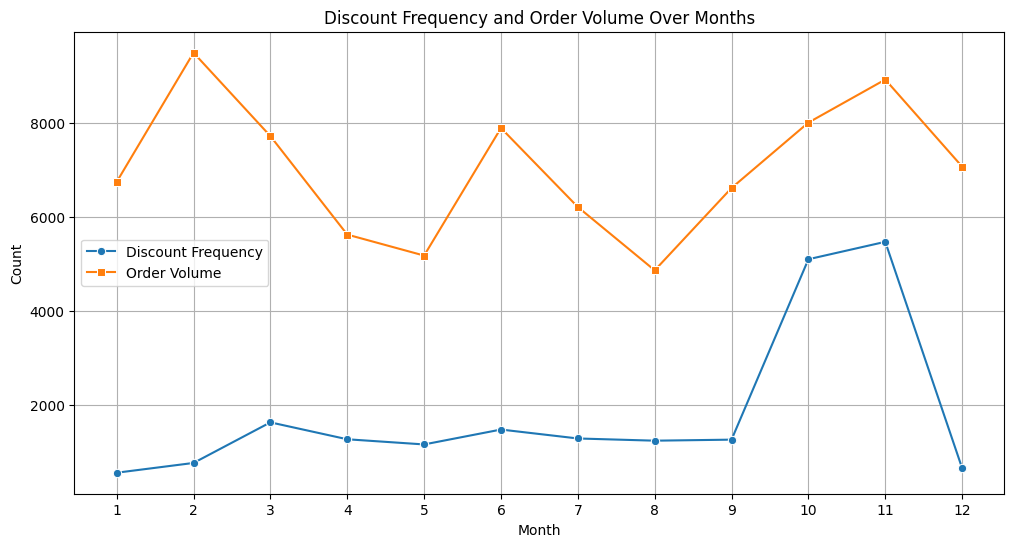

In [56]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

# Extract month from 'OrderDate'
df['OrderMonth'] = df['OrderDate'].dt.month

# Filter orders with discounts
discount_orders = df[df['DiscountPercentage'] > 0]

# Calculate discount frequency per month
discount_frequency_per_month = discount_orders.groupby('OrderMonth')['account_id'].count().reset_index()

# Calculate order volume per month
order_volume_per_month = df.groupby('OrderMonth')['account_id'].count().reset_index()

# Create the plot
plt.figure(figsize=(12, 6))

# Plot discount frequency
sns.lineplot(x='OrderMonth', y='account_id', data=discount_frequency_per_month, label='Discount Frequency', marker='o')

# Plot order volume
sns.lineplot(x='OrderMonth', y='account_id', data=order_volume_per_month, label='Order Volume', marker='s')

plt.title('Discount Frequency and Order Volume Over Months')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(range(1, 13))  # Set x-axis ticks to represent months
plt.legend()
plt.grid(True)
plt.show()

use

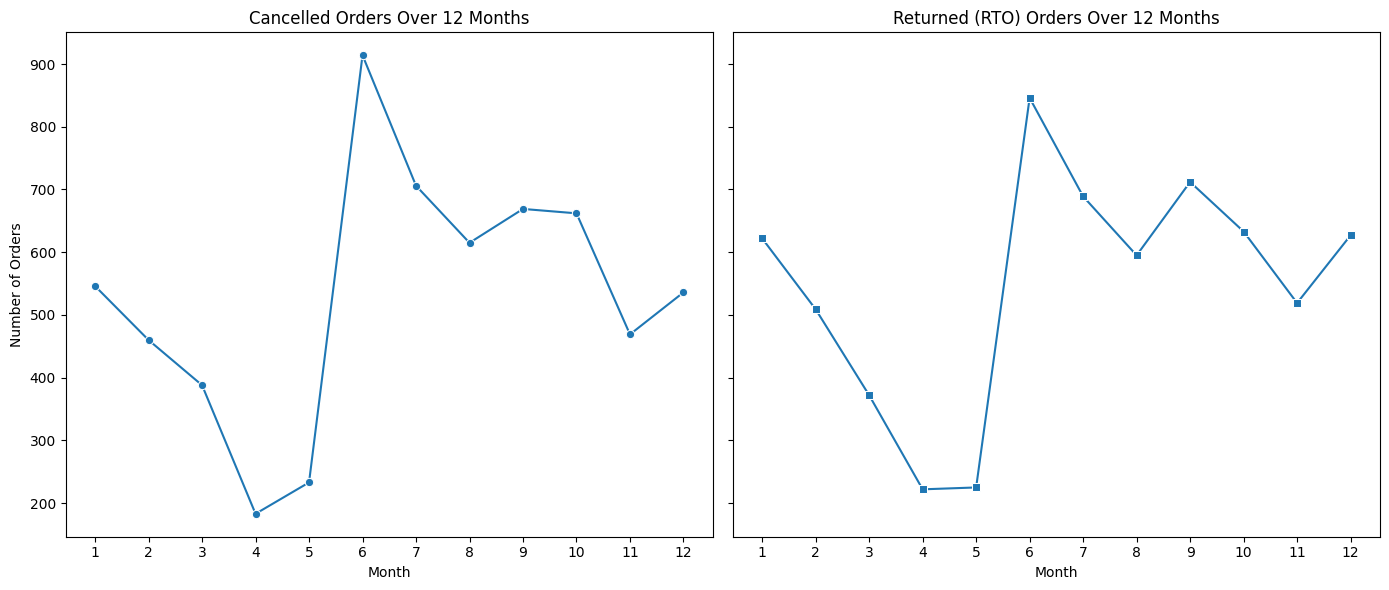

In [57]:
!pip install matplotlib seaborn pandas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame with 'OrderDate' and 'ReasonforCreditEntry' columns

# Convert 'OrderDate' to datetime
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

# Extract month from 'OrderDate'
df['OrderMonth'] = df['OrderDate'].dt.month
cancelled_orders = df[df['ReasonforCreditEntry'] == 'CANCELLED']
returned_orders = df[df['ReasonforCreditEntry'] == 'RTO']
cancelled_monthly_counts = cancelled_orders.groupby('OrderMonth')['account_id'].count().reset_index()
returned_monthly_counts = returned_orders.groupby('OrderMonth')['account_id'].count().reset_index()

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)  # sharey=True for shared y-axis

# Plot cancelled orders
sns.lineplot(x='OrderMonth', y='account_id', data=cancelled_monthly_counts, marker='o', ax=ax1)
ax1.set_title('Cancelled Orders Over 12 Months')
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Orders')
ax1.set_xticks(range(1, 13))

# Plot returned orders
sns.lineplot(x='OrderMonth', y='account_id', data=returned_monthly_counts, marker='s', ax=ax2)
ax2.set_title('Returned (RTO) Orders Over 12 Months')
ax2.set_xlabel('Month')
ax2.set_xticks(range(1, 13))

# Adjust layout and show plot
plt.tight_layout()
plt.show()

use

In [58]:
avg_discount_per_month = df.groupby('OrderMonth')['DiscountPercentage'].mean()
for month in range(1, 13):
    avg_discount = avg_discount_per_month.get(month, float('nan'))  # Handle missing months
    print(f"Month {month}: {avg_discount:.2f}%")

Month 1: 0.31%
Month 2: 0.96%
Month 3: 1.51%
Month 4: 0.79%
Month 5: 0.72%
Month 6: 0.94%
Month 7: 0.89%
Month 8: 2.26%
Month 9: 1.15%
Month 10: 3.84%
Month 11: 1.88%
Month 12: 0.28%


In [59]:
states = ['Uttar Pradesh', 'Tamil Nadu', 'Karnataka', 'Maharashtra', 'Andhra Pradesh']
filtered_df = df[df['CustomerState'].isin(states)]
state_reason_counts = filtered_df.groupby(['CustomerState', 'ReasonforCreditEntry'])['account_id'].count().reset_index()
total_orders_per_state = filtered_df.groupby('CustomerState')['account_id'].count().reset_index()
state_reason_counts = pd.merge(state_reason_counts, total_orders_per_state, on='CustomerState', suffixes=('', '_total'))
state_reason_counts['Percentage'] = (state_reason_counts['account_id'] / state_reason_counts['account_id_total']) * 100
print(state_reason_counts[['CustomerState', 'ReasonforCreditEntry', 'Percentage']])

     CustomerState ReasonforCreditEntry  Percentage
0   Andhra Pradesh            CANCELLED   11.945117
1   Andhra Pradesh  DOOR_STEP_EXCHANGED    0.040355
2   Andhra Pradesh            Delivered   71.953188
3   Andhra Pradesh                 LOST    0.282486
4   Andhra Pradesh              PENDING    0.121065
5   Andhra Pradesh        READY_TO_SHIP    0.282486
6   Andhra Pradesh                  RTO   14.487490
7   Andhra Pradesh              SHIPPED    0.887813
8        Karnataka            CANCELLED   13.883182
9        Karnataka  DOOR_STEP_EXCHANGED    0.029351
10       Karnataka            Delivered   69.327854
11       Karnataka                 LOST    0.352216
12       Karnataka        READY_TO_SHIP    0.264162
13       Karnataka                  RTO   15.115938
14       Karnataka              SHIPPED    1.027297
15     Maharashtra            CANCELLED   11.481242
16     Maharashtra  DOOR_STEP_EXCHANGED    0.129366
17     Maharashtra            Delivered   73.900388
18     Mahar

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84442 entries, 1 to 86326
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ReasonforCreditEntry     84442 non-null  object        
 1   SubOrderNo               84442 non-null  object        
 2   OrderDate                84442 non-null  datetime64[ns]
 3   CustomerState            43884 non-null  object        
 4   ProductName              84442 non-null  object        
 5   SKU                      84441 non-null  object        
 6   Size                     84442 non-null  object        
 7   Quantity                 84442 non-null  int64         
 8   SupplierListedPrice      84442 non-null  int64         
 9   SupplierDiscountedPrice  84442 non-null  float64       
 10  account_id               84442 non-null  int64         
 11  create_time              84442 non-null  datetime64[ns]
 12  update_time              84442 non-nu

In [61]:
total_revenue_2023 = df[df['OrderDate'].dt.year == 2019]['SupplierDiscountedPrice'].sum()
print(f"Total revenue in 2019: {total_revenue_2023}")

Total revenue in 2019: 794163.0


In [62]:
total_revenue_2023 = df[df['OrderDate'].dt.year == 2020]['SupplierDiscountedPrice'].sum()
print(f"Total revenue in 2020: {total_revenue_2023}")

Total revenue in 2020: 0.0


In [63]:
total_revenue_2023 = df[df['OrderDate'].dt.year == 2021]['SupplierDiscountedPrice'].sum()
print(f"Total revenue in 2021: {total_revenue_2023}")

Total revenue in 2021: 0.0


In [64]:
total_revenue_2023 = df[df['OrderDate'].dt.year == 2022]['SupplierDiscountedPrice'].sum()
print(f"Total revenue in 2022: {total_revenue_2023}")

Total revenue in 2022: 8358196.45


In [65]:
total_revenue_2023 = df[df['OrderDate'].dt.year == 2023]['SupplierDiscountedPrice'].sum()
print(f"Total revenue in 2023: {total_revenue_2023}")

Total revenue in 2023: 38140714.54000001


In [66]:
total_revenue_2023 = df[df['OrderDate'].dt.year == 2024]['SupplierDiscountedPrice'].sum()
print(f"Total revenue in 2024: {total_revenue_2023}")

Total revenue in 2024: 11859604.0


In [67]:
latest_date = df['OrderDate'].max()
print(f"Latest recorded date: {latest_date}")

Latest recorded date: 2024-06-24 00:00:00


In [68]:
orders_by_year = df.groupby(df['OrderDate'].dt.year).size()
print(orders_by_year)

OrderDate
2019     6143
2022    16816
2023    46821
2024    14662
dtype: int64


In [69]:
revenue_by_month_2023 = df[df['OrderDate'].dt.year == 2023].groupby(df['OrderDate'].dt.month)['SupplierDiscountedPrice'].sum()
print(revenue_by_month_2023)

OrderDate
1     1835875.85
2     2230082.03
3     2286781.90
4     2290392.33
5     2476947.08
6     4107967.21
7     4167089.89
8     3627269.53
9     4385565.68
10    4017242.26
11    3124163.78
12    3591337.00
Name: SupplierDiscountedPrice, dtype: float64


In [70]:
grouped_data = df.groupby([df['OrderDate'].dt.year, 'ReasonforCreditEntry'])['ReasonforCreditEntry'].count().unstack()
grouped_data['Return Rate'] = (grouped_data['RTO'] / grouped_data.sum(axis=1)) * 100
grouped_data['Cancellation Rate'] = (grouped_data['CANCELLED'] / grouped_data.sum(axis=1)) * 100
print(grouped_data[['Return Rate', 'Cancellation Rate']])

ReasonforCreditEntry  Return Rate  Cancellation Rate
OrderDate                                           
2019                          NaN           0.016279
2022                          NaN           0.166508
2023                     9.350505           9.201298
2024                    14.957032          13.919779
